# Предсказание стоимости поездки на такси в Нью-Йорке.

Описание признаков:

`key` - дата и время посадки

`pickup_datetime` - также дата и время посадки, но в другом формате

`pickup_longitude` - широта места посадки

`pickup_latitude` - долгота места посадки

`dropoff_longitude` - широта места высадки

`dropoff_latitude` - долгота места высадки

`passenger_count` - количество пассажиров

`fare_amount` - стоимость поездки

## Импорт библиотек, загрузка данных

Импортируем необходимые для начала библиотеки

In [2]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

C:\Users\vasil\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Считаем данные

In [3]:
df = pd.read_csv("data.csv")

df.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2011-11-23 14:36:35.0000003,2011-11-23 14:36:35 UTC,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5
1,2013-09-14 21:40:00.00000016,2013-09-14 21:40:00 UTC,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5
2,2012-04-30 18:13:19.0000002,2012-04-30 18:13:19 UTC,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5
3,2010-10-22 15:03:47.0000001,2010-10-22 15:03:47 UTC,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5
4,2011-02-18 18:08:16.0000002,2011-02-18 18:08:16 UTC,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1


In [42]:
df.shape

(615962, 8)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615962 entries, 0 to 615961
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                615962 non-null  object 
 1   pickup_datetime    615962 non-null  object 
 2   pickup_longitude   615962 non-null  float64
 3   pickup_latitude    615961 non-null  float64
 4   dropoff_longitude  615959 non-null  float64
 5   dropoff_latitude   615959 non-null  float64
 6   passenger_count    615961 non-null  float64
 7   fare_amount        615961 non-null  float64
dtypes: float64(6), object(2)
memory usage: 37.6+ MB


Удалим строки с пропущенными значениями из таблицы.

In [4]:
df = df.dropna(axis=0)

Удалим из данных колонку `key`, так как в ней дублируется информация из `pickup_datetime`.

In [5]:
df = df.drop('key', axis=1)

Обработаем колонку `pickup_datetime`. Выделим из нее 4 новых столбца:

* `year` - год поездки
* `month` - месяц поездки
* `day` - день поездки
* `hour` - час поездки.

Затем удалим столбец `pickup_datetime`.



In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime']).dt.round('h')

In [7]:
df['year'] = df['pickup_datetime'].dt.year.astype(int)
df['month'] = df['pickup_datetime'].dt.month.astype(int)
df['day'] = df['pickup_datetime'].dt.day.astype(int)
df['hour'] = df['pickup_datetime'].dt.hour.astype(int)

In [8]:
df = df.drop(['pickup_datetime'], axis=1)

In [9]:
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day,hour
0,-73.959075,40.783316,-73.959087,40.783345,1.0,2.5,2011,11,23,15
1,-73.931612,40.771060,-73.929097,40.760542,1.0,5.5,2013,9,14,22
2,-73.997929,40.740983,-74.007197,40.727725,2.0,6.5,2012,4,30,18
3,-73.980608,40.742449,-73.985609,40.755807,1.0,6.5,2010,10,22,15
4,-74.008884,40.720314,-73.983280,40.722350,1.0,12.1,2011,2,18,18


In [50]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,year,month,day,hour
count,615959.000000,615959.000000,615959.000000,615959.000000,615959.000000,615959.000000,615959.000000,615959.000000,615959.000000,615959.000000
mean,-72.528287,39.932560,-72.531908,39.917904,1.685127,11.332180,2011.741126,6.263553,15.705256,13.444804
std,11.517516,8.754114,11.829973,10.339851,1.309251,9.743292,1.859415,3.434809,8.684390,6.680492
min,-1280.547368,-3447.915090,-3328.756240,-3493.651853,0.000000,-45.000000,2009.000000,1.000000,1.000000,0.000000
25%,-73.992078,40.735004,-73.991380,40.734070,1.000000,6.000000,2010.000000,3.000000,8.000000,9.000000
50%,-73.981803,40.752714,-73.980167,40.753212,1.000000,8.500000,2012.000000,6.000000,16.000000,14.000000
75%,-73.967087,40.767184,-73.963688,40.768120,2.000000,12.500000,2013.000000,9.000000,23.000000,19.000000
max,2512.533050,1629.004200,2058.322398,1640.072227,6.000000,370.000000,2015.000000,12.000000,31.000000,23.000000


По описанию статистики признаков видно, что есть несуществующие координаты мест посадки и высадки и отрицательная стоимость. Нулевое число пассажиров вполне возможно, если поездка не состоялась.

Рассмотрим детальнее координаты высадки пассажиров.

Воспользуемся знанием предметной области. Координаты юго-западной границы Нью-Йорка: $40.500409$, $-74.259756$. Координаты восточной границы: $40.739368$, $-73.700613$. Координаты северной границы: $40.917927$, $-73.918237$. Восточнее и южнее координат точки с координатами ($40.541759$, $-73.969662$) находится океан.

Посмотрим на распределение точек-координат чуть более в широком диапазоне, чем границы города.

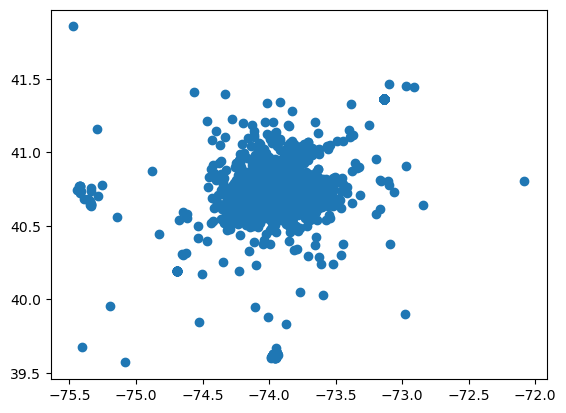

In [51]:
plt.scatter(data=df.query('39 < dropoff_latitude < 42 & -76 < dropoff_longitude < -72'),
             x='dropoff_longitude',
            y='dropoff_latitude')

Видно, что есть большое облако точек, которое однако указывает не только на город Нью-Йорк, но и прилежащую территорию с северо-западной стороны. То есть такси высаживало пассажиров и за пределами города.
Также есть маленькие области точек в южной и западной части. Посмотрим сколько точек в западной области.

In [52]:
df.query('40.5 < dropoff_latitude < 41.9 & -75.6 < dropoff_longitude < -75.1').count()

pickup_longitude     25
pickup_latitude      25
dropoff_longitude    25
dropoff_latitude     25
passenger_count      25
fare_amount          25
year                 25
month                25
day                  25
hour                 25
dtype: int64

Совсем немного точек, поэтому их можно не учитывать, поскольку они находятся слишком далеко от города. Южная часть попадает на океан, поэтому их также не будем учитывать. Преобразуем данные с учётом всех приведённых условий.

In [10]:
df = df.query('40.2 < dropoff_latitude < 41.3 & -74.6 < dropoff_longitude < -73.2 \
                & not (dropoff_latitude < 40.541759 & dropoff_longitude > -73.969662)')

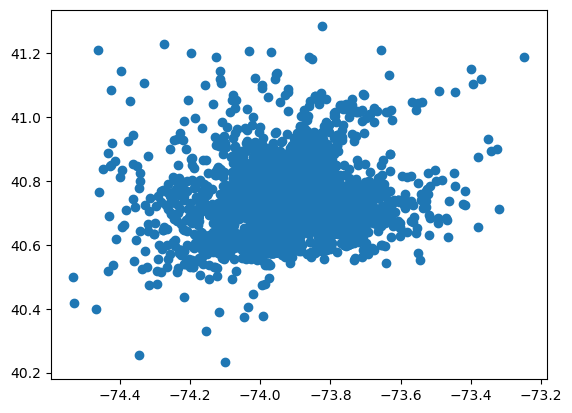

In [54]:
plt.scatter(data=df, x='dropoff_longitude', y='dropoff_latitude')

Теперь посмотрим на координаты мест посадки пассажиров.

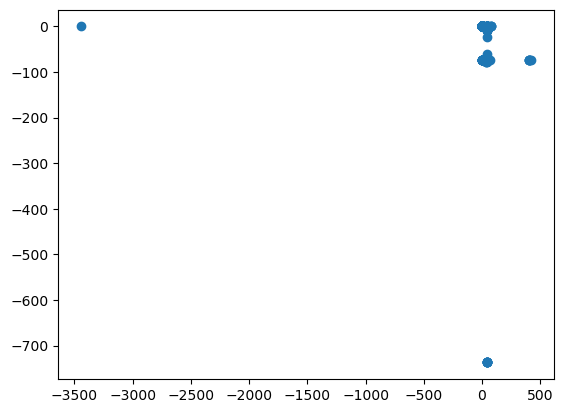

In [55]:
plt.scatter(data=df, y='pickup_longitude', x='pickup_latitude')

Есть выбросы. Посмотрим на ту же область, в которой рассматривали координаты высадки.

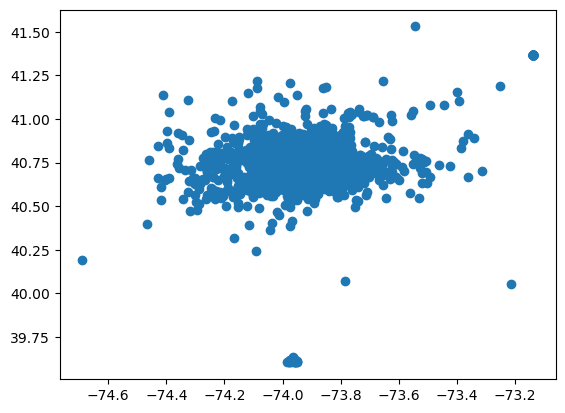

In [56]:
plt.scatter(data=df.query('-75 < pickup_longitude < -73 & 39 < pickup_latitude < 42'),
            x='pickup_longitude',
            y='pickup_latitude')

В целом есть небольшое количество отдельных точек. Преобразуем аналогично координатам высадки.

In [11]:
df = df.query('-74.5 < pickup_longitude < -73.3 & 40.3 < pickup_latitude < 41.3 \
                & not (pickup_latitude < 40.541759 & pickup_longitude > -73.969662)')

Снова посмотрим на распределение, чтобы проверить себя.

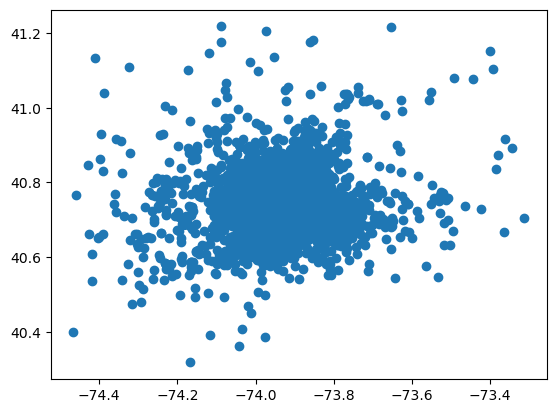

In [58]:
plt.scatter(data=df, x='pickup_longitude', y='pickup_latitude')

Разобьём данные на матрицу объект-признак `X` и вектор с целевой переменной `y`. Целевая переменная - столбец `fare_amount`.

In [12]:
y = df['fare_amount']
X = df.drop('fare_amount', axis=1)

Посмотрим на распределение целевой переменной

<Axes: >

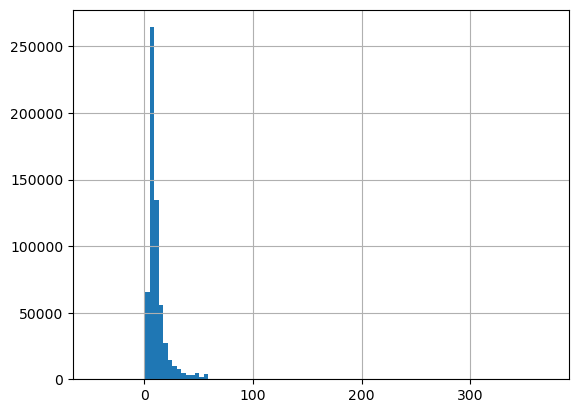

In [60]:
y.hist(bins=100)

Распределение не симметрично. С такими распределениями модели плохо работают, поэтому сначала преобразуем отрицательные значения, а затем логарифмируем переменную.

In [13]:
y = y.apply(lambda x: 0 if x < 0 else x)

In [14]:
X = X.loc[y.index, :]

In [15]:
y_new = y.apply(np.log1p)

Снова посмотрим на распределение.

<Axes: >

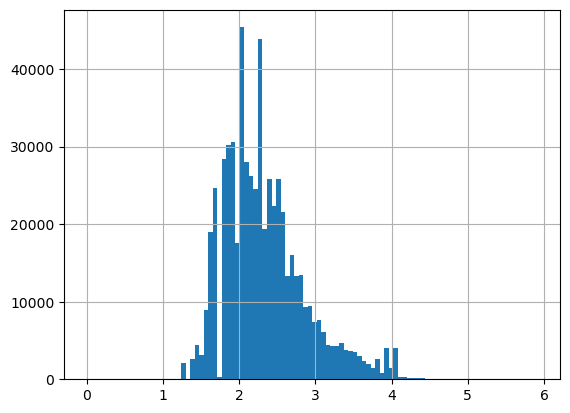

In [64]:
y_new.hist(bins=100)

Разобьём данные на тренировочные и тестовые части.

In [16]:
from sklearn.model_selection import cross_val_score, train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.25, random_state=42)

Посмотрим на корреляцию признаков с целевой переменной и между собой.

In [18]:
import seaborn as sns

<Axes: >

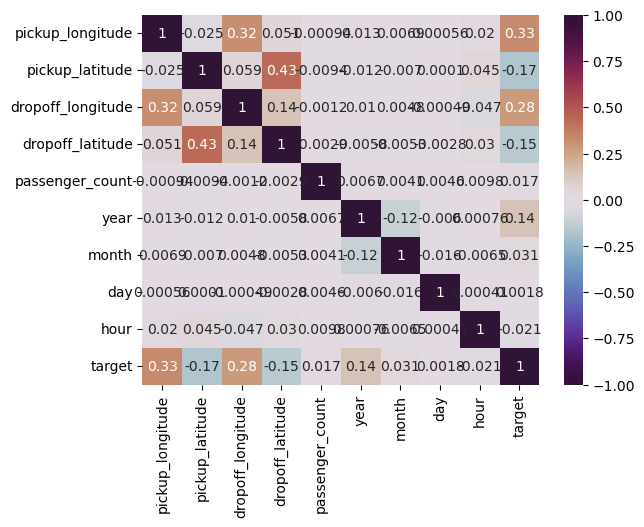

In [68]:
temp_df = X_train.copy()
temp_df['target'] = y_train

sns.heatmap(data=temp_df.corr(), cmap='twilight_shifted', annot=True, vmin=-1, vmax=1)

Признаки не коррелируют между собой и с целевой переменной. Меньше всего с целевой переменной коррелирует число дня. Посмотрим на нелинейную корреляцию с помощью взаимной информации.

In [69]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(X_train, y_train)
features_mi = pd.DataFrame({'features': X_train.columns, 'mi': mi})
features_mi.sort_values(by='mi', ascending=False)

,features,mi
5,year,0.471591
2,dropoff_longitude,0.127583
3,dropoff_latitude,0.117666
0,pickup_longitude,0.106707
1,pickup_latitude,0.086216
8,hour,0.018664
6,month,0.017495
4,passenger_count,0.007623
7,day,0.000000


С точки зрения взаимной информации число дня также не представляет важности.
Удалим этот признак.

In [19]:
X_train.drop('day', axis=1, inplace=True)

In [20]:
X_test.drop('day', axis=1, inplace=True)

Обучим базовые модели на кросс-валидации, используя метрику R2. Перед использованием метрики здесь и далее будем делать обратное преобразование целевой переменной, поскольку она была подвержена логарифмированию.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [73]:
%%time
base_models = [LinearRegression(), DecisionTreeRegressor(max_depth=3), RandomForestRegressor(max_depth=3)]

for model in base_models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model, r2_score(np.expm1(y_test), np.expm1(pred)))

LinearRegression() -0.10779162274987675
DecisionTreeRegressor(max_depth=3) 0.5154981880009928
RandomForestRegressor(max_depth=3) 0.5210826740603405
CPU times: total: 55 s
Wall time: 1min 32s


Линейная модель не подходит. Случайный лес обучается очень долго из-за большого размера датасета. Поэтому временно будем использовать модель дерева.

Подберём максимальную глубину дерева с использованием кросс-валидации.

In [22]:
RANDOM_STATE = 313

Для начала напишем функцию, которая будет выдавать предсказание при кросс-валидации и на тестовых данных для заданной модели и данных. Опираться будем на результат кросс-валидации.

In [23]:
def get_scores(estimator, X, y, Xtest, ytest, cv=4):
    scores = cross_val_score(estimator, X, y, cv=cv, scoring='r2')
    estimator.fit(X, y)
    pred = estimator.predict(Xtest)
    return scores.mean(), r2_score(np.expm1(ytest), np.expm1(pred))

In [76]:
for depth in range(3, 15):
    model = DecisionTreeRegressor(max_depth=depth, random_state=RANDOM_STATE)
    r2_mean, r2_test = get_scores(model, X_train, y_train, X_test, y_test)
    print(depth, r2_mean, r2_test)

3 0.37341008768987644 0.5154981880009923
4 0.4185788186789757 0.5606978294580578
5 0.46046090067156276 0.6161760803970795
6 0.4941752152201278 0.6462363284455857
7 0.5150996608617273 0.6751452977579961
8 0.5427980437811003 0.7008777715887428
9 0.5566930679230316 0.7071600327391321
10 0.5778164439961171 0.7219223303575473
11 0.5898061609408056 0.7223810158002424
12 0.6004673540444584 0.7289768778081442
13 0.6056013312840656 0.7311286644308028
14 0.6177948497497141 0.7389206062264719


Средняя оценка при кросс-валидации и оценка на тестовых данных растёт при увеличении глубины дерева вплоть до 26. Это может свидетельствовать о переобучении модели. Для экономии времени пока зафиксируем глубину дерева 10. Для этой глубины R2 на кросс-валидации равна 0.578, на тестовых - 0.722.

## Создание и отбор признаков

Очевидно, что стоимость поездки должна зависеть от пройденного пути и/или времени в пути. Время нам недоступно. Точное расстояние по двум точкам вычислить невозможно, поэтому воспользуемся приближениями. Вычислим для каждой поездки евклидово и манхэттенское расстояние.

In [24]:
X_train['distance'] = np.sqrt((X_train['pickup_longitude'] - X_train['dropoff_longitude']) ** 2 + \
                      (X_train['pickup_latitude'] - X_train['dropoff_latitude']) ** 2)
X_train['dist_Manh'] = np.abs(X_train['pickup_longitude'] - X_train['dropoff_longitude']) + \
                      np.abs(X_train['pickup_latitude'] - X_train['dropoff_latitude'])

Посмотрим на корреляцию расстояний с целевой переменной.

<Axes: >

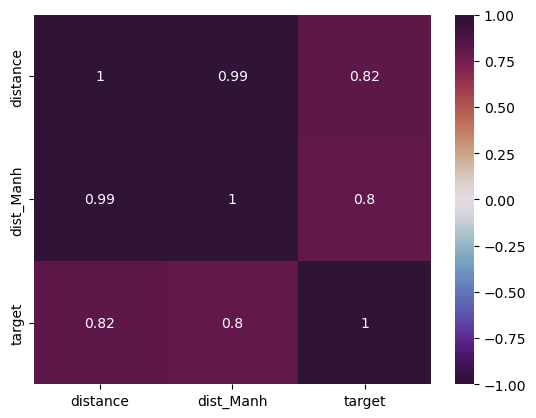

In [79]:
temp_df = X_train.copy()
temp_df['target'] = y_train

sns.heatmap(data=temp_df[['distance', 'dist_Manh', 'target']].corr(), cmap='twilight_shifted', annot=True, vmin=-1, vmax=1)

Евклидово расстояние чуть лучше коррелирует с целевой переменной. Учитывая, что оно сильно коррелирует с манхэттенским расстоянием, оставим только евклидово. Также добавим евклидово расстояние в тестовые данные.

In [25]:
X_train.drop('dist_Manh', axis=1, inplace=True)
X_test['distance'] = np.sqrt((X_test['pickup_longitude'] - X_test['dropoff_longitude']) ** 2 + \
                      (X_test['pickup_latitude'] - X_test['dropoff_latitude']) ** 2)

Проверим улучшилось ли предсказание.

In [150]:
model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
r2_mean, r2_test = get_scores(model, X_train, y_train, X_test, y_test)
print(r2_mean, r2_test)

0.8092220415832609 0.8133792135091695


Оценка значительно улучшилась!

Посмотрим, сущестуют ли данные с нулевым расстоянием и какая у них цена. Это могут быть несостоявшиеся поездки.

In [44]:
temp_df = X_train.copy()
temp_df['target'] = y_train

temp_df[['distance', 'target']].query('distance == 0').shape

(4711, 2)

Видим, что есть немало несостоявшихся поездок. Посмотрим на распределение стоимости таких "поездок".

<Axes: >

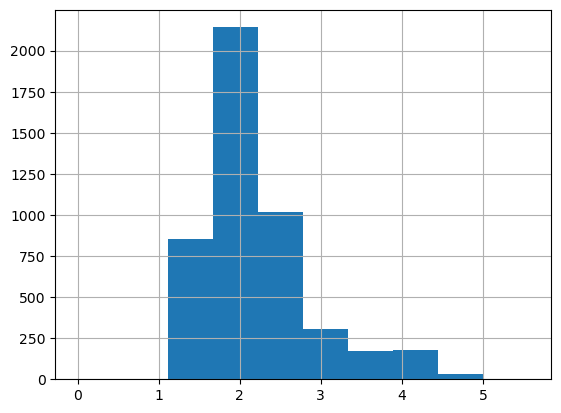

In [45]:
temp_df[['distance', 'target']].query('distance == 0')['target'].hist()

Видно, что такие поездки обязательно оплачиваются. Вероятно это является некоторым депозитом. Посмотрим на распределение цен в зависимости от расстояния.

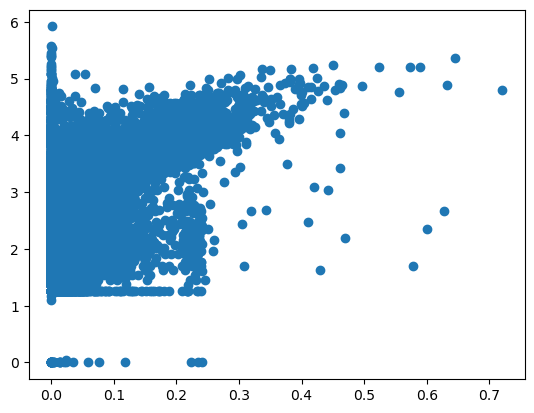

In [46]:
temp_df = X_train.copy()
temp_df['target'] = y_train

plt.scatter(data=temp_df, x='distance', y='target')

Существует некоторое число точек в области нулевой цены для достаточно широкого предела расстояний. Посмотрим подробнее.

In [47]:
temp_df.query('target < 0.5')[['distance', 'target']].shape

(33, 2)

Эти поездки могут быть льготными или с особыми привилениями. Но их очень мало, поэтому они также могут оказаться выбросами, учитывая, что даже несостоявшиеся поездки имеют некоторый депозит. Удалим эти данные.

In [26]:
y_train = y_train[y_train > 0.5]

In [27]:
X_train = X_train.loc[y_train.index, :]

Ранее нулевое число пассажиров не было удалено, так как эти записи могли относиться к несостоявшимся поездкам. Теперь, когда у нас есть данные о расстоянии, мы можем посмотреть, есть ли данные с нулевым значением числа пассажиров и ненулевым расстоянием. Эти данные точно являются выбросами.

In [50]:
X_train[['distance', 'passenger_count']].query('passenger_count == 0 & distance != 0').shape

(1576, 2)

Такие выбросы есть. Удалим их. Однако существует всего три записи с нулевым расстоянием и отсутствием пассажиров. Также удалим их.

In [28]:
X_train = X_train.query('passenger_count != 0')
y_train = y_train[X_train.index]

Посмотрим на текущее предсказание.

In [52]:
model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
r2_mean, r2_test = get_scores(model, X_train, y_train, X_test, y_test)
print(r2_mean, r2_test)

0.8107599090101474 0.8150541866935515


Предсказание чуть улучшилось

Посмотрим как влияет число пассажиров на стоимость поездки. Ранее было показано, что число пассажиров не коррелирует с целевой переменной. Однако посмотрим как цена зависит от расстояния с разным числом пассажиров.

C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


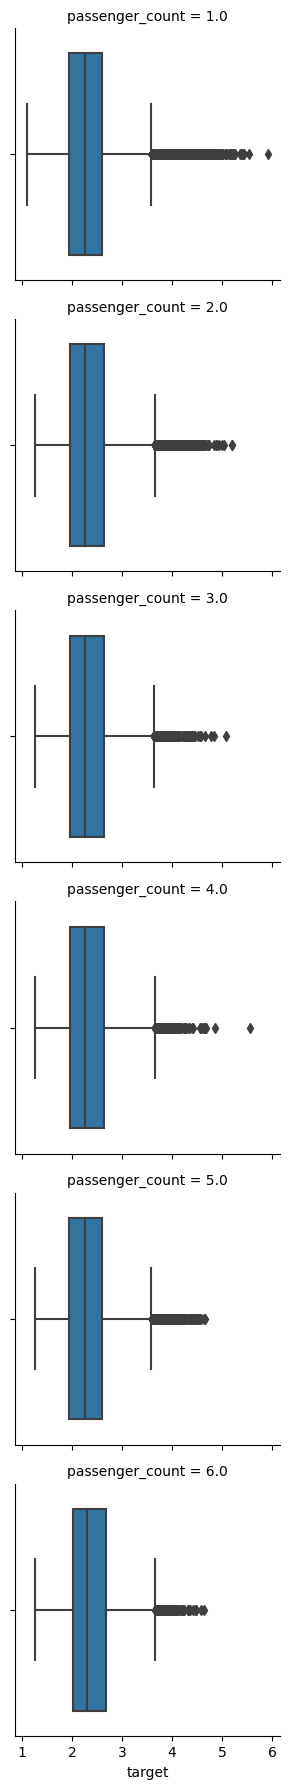

In [53]:
temp_df = X_train.copy()
temp_df['target'] = y_train

g = sns.FacetGrid(data=temp_df, col='passenger_count', col_wrap=1)
g.map(sns.boxplot, 'target')

Смещения общей массы данных по оси цены практически не происходит при изменении цены. Пока оставим число пассажиров как есть.

Рассмотрим подробнее влияние месяца и года поездок на целевую переменную.

Посмотрим как зависит цена поездки от года, от месяца, от года для разных месяцев и от месяца для разных годов. Также создадим новый признак - время в месяцах, составлянный из года и месяца.

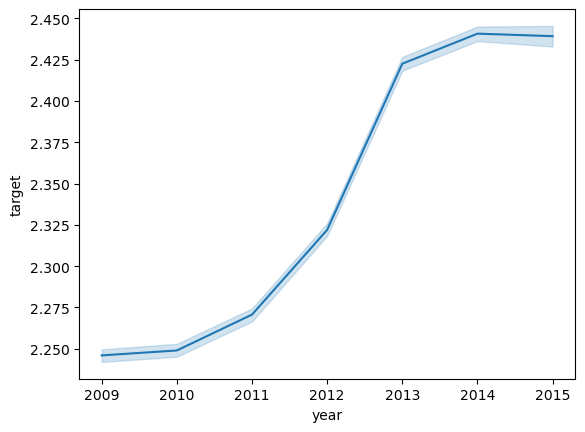

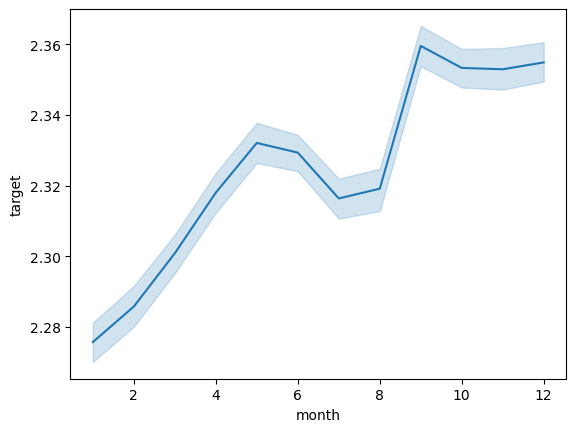

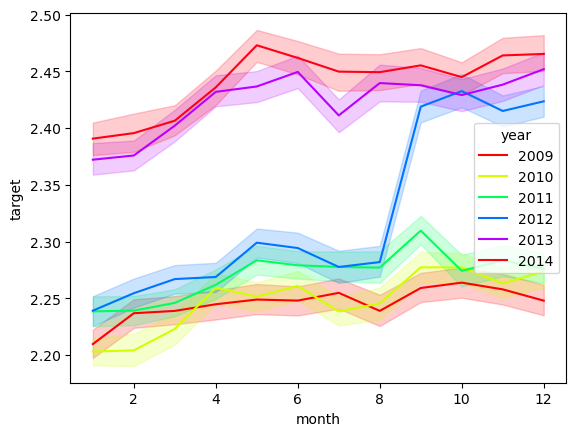

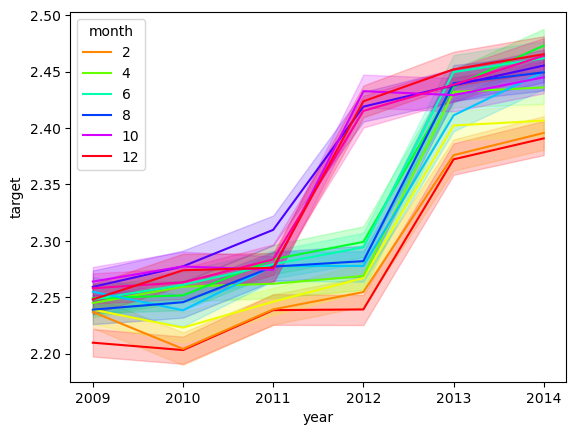

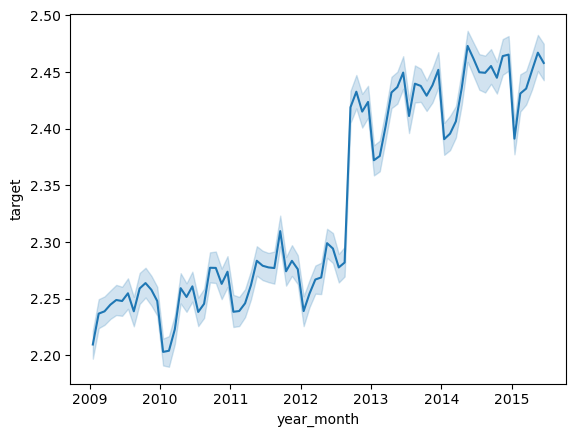

In [54]:
temp_df = X_train.copy()
temp_df['target'] = y_train
temp_df['year_month'] = temp_df['year'] + (temp_df['month'] - 0.5) / 12

sns.lineplot(data=temp_df, x='year', y='target')
plt.show()
sns.lineplot(data=temp_df.query('year_month < 2015'), x='month', y='target')
plt.show()
sns.lineplot(data=temp_df.query('year_month < 2015'), x='month', y='target', hue='year', palette='hsv')
plt.show()
sns.lineplot(data=temp_df.query('year_month < 2015'), x='year', y='target', hue='month', palette='hsv')
plt.show()
sns.lineplot(data=temp_df.query('year_month < 2015.5'), x='year_month', y='target')
plt.show()

Видно, что с каждый годом средняя стоимость поездки растёт, что скорее всего связано с инфляцией. От месяца стоимость в среднем возрастает. Это также видно на зависимостях от года по месяцам: в начале года стоимость чуть меньше, чем в конце года. Причём цена резко возрастает в первые 2-3 месяца каждый год, а затем колеблется. Также мы видим резкое возрастание цены в сентябре 2012 - этим можно воспользоваться. Создадим признак.

In [29]:
X_train['year_month'] = X_train['year'] + (X_train['month'] - 0.5) / 12

X_test['year_month'] = X_test['year'] + (X_test['month'] - 0.5) / 12

Цена меньше в начале каждого года, но в 2012 был резкий скачок цены. Для большей информативности признака на основе начала года, разделим данные на 4 категории: начало года и вторая часть года до сентября 2012, и аналогично две категории начиная с сентября 2012.

In [30]:
def make_col(month_year):
    month = month_year.month
    year = month_year.year_month
    if month < 4 and year < 2012.7:
        return 0
    elif month >= 4 and year < 2012.7:
        return 1
    elif month < 4 and year > 2012.7:
        return 2
    return 3

In [31]:
X_train['year_month_type'] = X_train[['month', 'year_month']].apply(make_col, axis=1)

In [32]:
X_test['year_month_type'] = X_test[['month', 'year_month']].apply(make_col, axis=1)

Посмотрим на корреляцию новых признаков.

<Axes: >

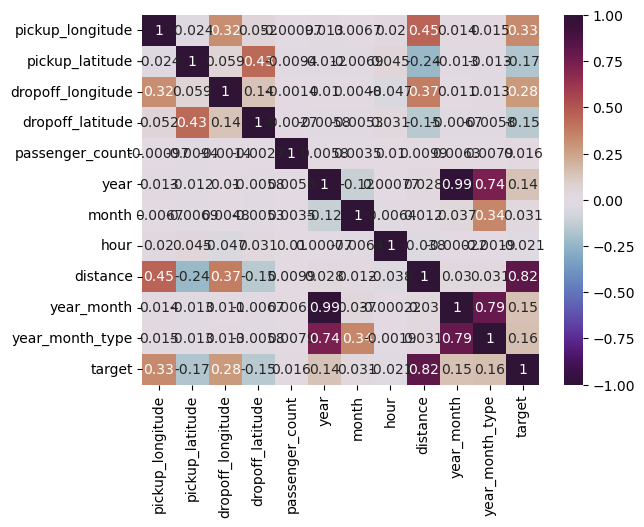

In [59]:
temp_df = X_train.copy()
temp_df['target'] = y_train

sns.heatmap(data=temp_df.corr(), cmap='twilight_shifted', annot=True, vmin=-1, vmax=1)

Удалим год как коррелирующий с признаком `year_month` и из-за меньшей информативности.

In [33]:
X_train.drop('year', axis=1, inplace=True)
X_test.drop('year', axis=1, inplace=True)

Посмотрим как изменилось предсказание.

In [61]:
model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
r2_mean, r2_test = get_scores(model, X_train, y_train, X_test, y_test)
print(r2_mean, r2_test)

0.813389194716456 0.8149486801669659


Точность на кросс-валидации улучшилась

Посмотрим на важность признаков для модели.

In [62]:
pd.DataFrame({'features': X_train.columns, 'importance': model.feature_importances_}) \
              .sort_values(by='importance', ascending=False)

,features,importance
7,distance,0.939448
9,year_month_type,0.013903
8,year_month,0.013710
2,dropoff_longitude,0.011831
3,dropoff_latitude,0.008555
6,hour,0.006906
0,pickup_longitude,0.003377
1,pickup_latitude,0.001901
5,month,0.000267
4,passenger_count,0.000101


Новые признаки оказались достаточно важными. Посмотрим подробнее на час поездки.

<Axes: xlabel='hour', ylabel='target'>

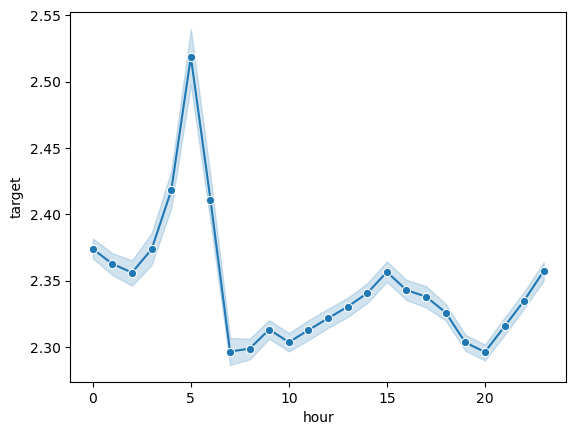

In [63]:
temp_df = X_train.copy()
temp_df['target'] = y_train

sns.lineplot(data=temp_df, x='hour', y='target', marker='o')

Видим, что в пять утра цена достигает пика. Скорее всего в это время жители Нью-Йорка едут на работу. Создадим новый признак, обозначающий это время. Проверим разные комбинации охвата часов от 4 до 6 утра.

In [64]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)

for morning_h in [(5,), (4, 5), (5, 6), (4, 5, 6)]:
    X_train_copy['morning'] = X_train_copy['hour'].apply(lambda x: 1 if x in morning_h else 0)
    X_test_copy['morning'] = X_test_copy['hour'].apply(lambda x: 1 if x in morning_h else 0)
    r2_mean, r2_test = get_scores(model, X_train_copy, y_train, X_test_copy, y_test)
    print(r2_mean, r2_test)

0.8136040589595482 0.8161994329383679
0.8134818029698386 0.8138648202163734
0.8134370071376206 0.8169327089809575
0.8134697315393455 0.8149215943575769


Наилучший результат на кросс-валидации достигается, если взять за отдельную категорию 5 утра.

In [34]:
X_train['morning'] = X_train['hour'].apply(lambda x: 1 if x == 5 else 0)
X_test['morning'] = X_test['hour'].apply(lambda x: 1 if x == 5 else 0)

Проверим себя

In [66]:
model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
r2_mean, r2_test = get_scores(model, X_train, y_train, X_test, y_test)
print(r2_mean, r2_test)

0.8136040589595482 0.8161994329383679


In [67]:
pd.DataFrame({'features': X_train.columns, 'importance': model.feature_importances_}) \
              .sort_values(by='importance', ascending=False)

,features,importance
7,distance,0.939404
9,year_month_type,0.016513
2,dropoff_longitude,0.011644
8,year_month,0.011019
3,dropoff_latitude,0.009243
6,hour,0.006858
0,pickup_longitude,0.003481
1,pickup_latitude,0.001384
5,month,0.000253
4,passenger_count,0.000101


Новый признак оказался не таким важным, как остальные, но пока оставим как есть.

Возможно цена также зависит от региона посадки и высадки пассажиров. Посмотрим как меняется распределение координат в зависимости от цены.

C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


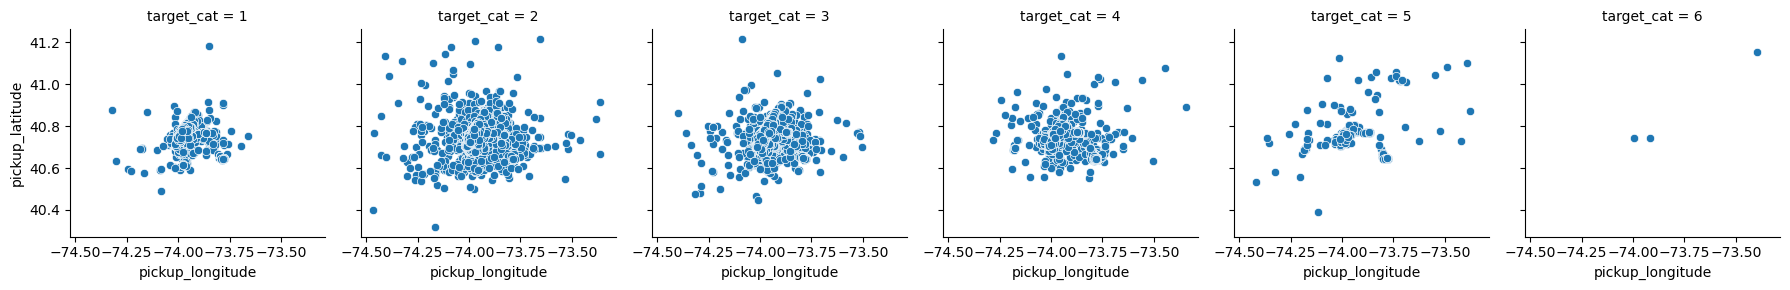

C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


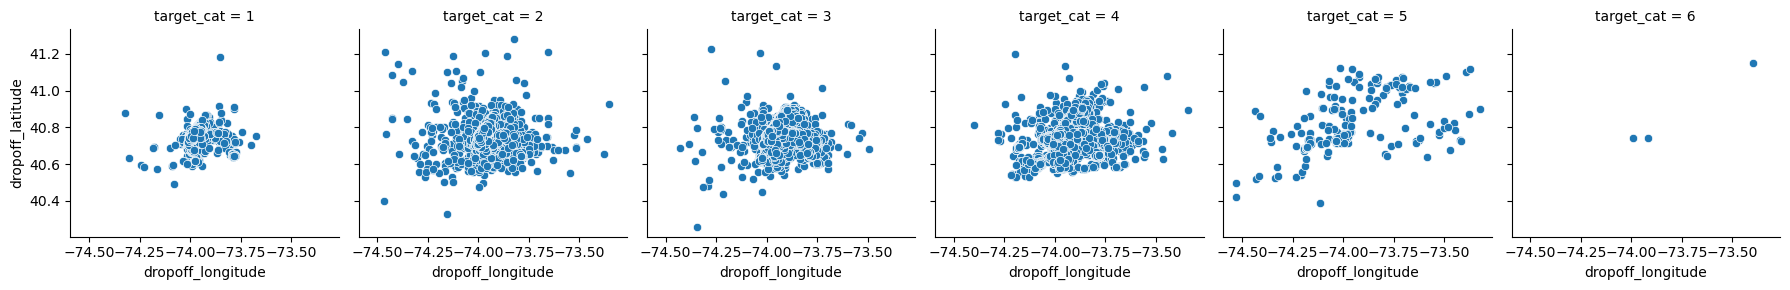

In [68]:
temp_df = X_train.copy()
temp_df['target'] = y_train

temp_df['target_cat'] = temp_df['target'].apply(round)
g = sns.FacetGrid(data=temp_df, col='target_cat', col_wrap=6)
g.map(sns.scatterplot, 'pickup_longitude', 'pickup_latitude')
plt.show()
g = sns.FacetGrid(data=temp_df, col='target_cat', col_wrap=6)
g.map(sns.scatterplot, 'dropoff_longitude', 'dropoff_latitude')
plt.show()

Наименьшая цена в некоторой маленькой области территории как при посадке так и при высадке. С увеличением цены увеличивается территория. Однако конкретная взаимосвязь не просматривается. Также видим, что для средней цены 6 слишком мало точек - возможно это выбросы. Посмотрим как меняется результат предсказания, если их выбросить.

In [35]:
y_train = y_train[y_train <= 5]
X_train = X_train.loc[y_train.index, :]

model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)

get_scores(model, X_train, y_train, X_test, y_test)

(0.814600874641364, 0.8152685166155468)

Точность увеличилась. Оставим как есть.

Снова посмотрим на распределение мест посадки.

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

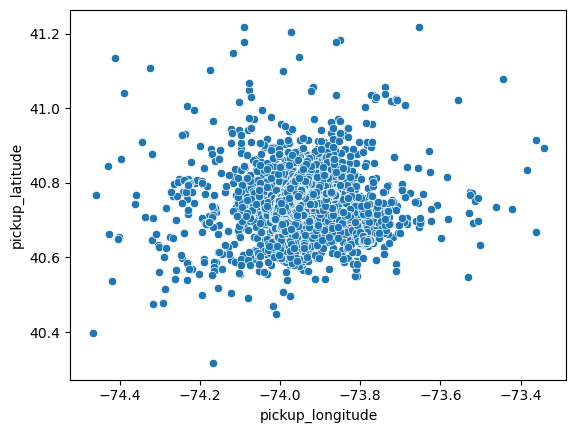

In [70]:
sns.scatterplot(data=X_train, x='pickup_longitude', y='pickup_latitude')

Дальние точки слишком удалены от основной массы и они могут оказаться шумовыми. Попробуем постепенно сдвигать границы координат посадки пассажиров к центру. Затем то же самое сделаем для координат высадки пассажиров.

In [36]:
max_p_long = X_train['pickup_longitude'].max()
max_p_lat = X_train['pickup_latitude'].max()
min_p_long = X_train['pickup_longitude'].min()
min_p_lat = X_train['pickup_latitude'].min()
max_d_long = X_train['dropoff_longitude'].max()
max_d_lat = X_train['dropoff_latitude'].max()
min_d_long = X_train['dropoff_longitude'].min()
min_d_lat = X_train['dropoff_latitude'].min()

In [72]:
for shift in np.arange(0, 0.35, 0.01):
    temp_df = X_train.copy()
    y_train_copy = y_train.copy()

    temp_df = temp_df.query(f'{min_p_long + 0.25} <= pickup_longitude <= {max_p_long - 0.25} & \
                           {min_p_lat + 0.25} <= pickup_latitude <= {max_p_lat - 0.25}')
    temp_df = temp_df.query(f'{min_d_long + shift} <= dropoff_longitude <= {max_d_long - shift} & \
                           {min_d_lat + shift} <= dropoff_latitude <= {max_d_lat - shift}')

    y_train_copy = y_train_copy[temp_df.index]

    model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
    print(round(shift, 2), get_scores(model, temp_df, y_train_copy, X_test, y_test))

0.0 (0.8160248484181711, 0.8197305853668337)
0.01 (0.8162369930841313, 0.8132436933731152)
0.02 (0.8162369930841313, 0.8132436933731152)
0.03 (0.8162291160479809, 0.8132456686712701)
0.04 (0.8162291160479809, 0.8132456686712701)
0.05 (0.8162291160479809, 0.8132456686712701)
0.06 (0.8161837993823369, 0.8163251077319876)
0.07 (0.8161837993823369, 0.8163251077319876)
0.08 (0.8161836980831944, 0.8168211738590923)
0.09 (0.8161834951331534, 0.8163480061881425)
0.1 (0.8162434089080871, 0.817727047646415)
0.11 (0.8162895470159204, 0.8179578764395505)
0.12 (0.8162895470159204, 0.8179578764395505)
0.13 (0.8162838125103624, 0.8181630768848723)
0.14 (0.8162901786649489, 0.8181281017539817)
0.15 (0.8163346941485948, 0.8195833411762972)
0.16 (0.8163260927995296, 0.8195815356564965)
0.17 (0.816232383435974, 0.819206556972342)
0.18 (0.8162217102336472, 0.8192065381638872)
0.19 (0.8162165535383304, 0.819330131074325)
0.2 (0.8160671297202264, 0.8187539852799994)
0.21 (0.8159349275706287, 0.8192248041316

Результат оказался наилучшим при сдвиге границ мест посадки на 0.25 и мест высадки - на 0.15.

In [37]:
X_train = X_train.query(f'{min_p_long + 0.25} < pickup_longitude < {max_p_long - 0.25} & \
                          {min_p_lat + 0.25} < pickup_latitude < {max_p_lat - 0.25} & \
                          {min_d_long + 0.15} < dropoff_longitude < {max_d_long - 0.15} & \
                          {min_d_lat + 0.15} < dropoff_latitude < {max_d_lat - 0.15}')

y_train = y_train[X_train.index]
model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
get_scores(model, X_train, y_train, X_test, y_test)

(0.8163346941485948, 0.8195833411762972)

Результат улучшился.

Посмотрим на новое распределение координат.

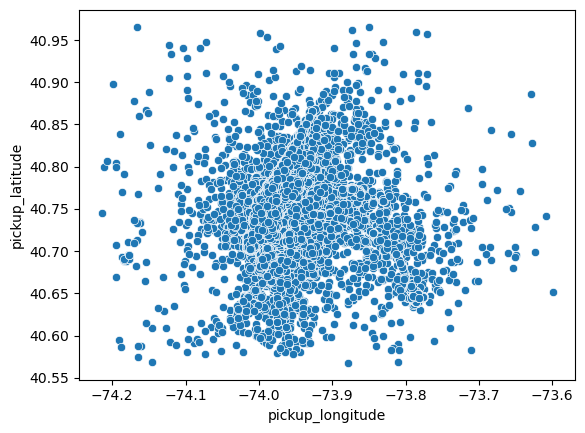

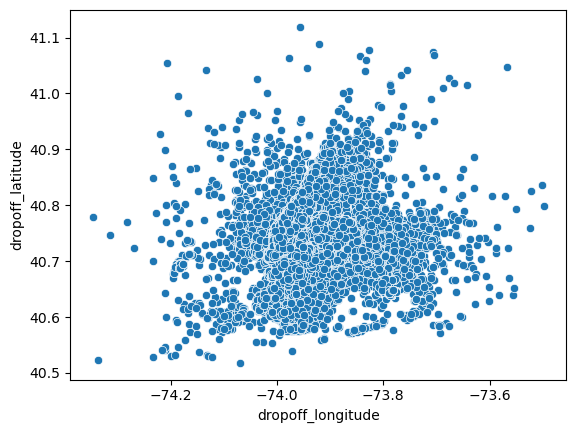

In [74]:
sns.scatterplot(data=X_train, x='pickup_longitude', y='pickup_latitude')
plt.show()
sns.scatterplot(data=X_train, x='dropoff_longitude', y='dropoff_latitude')
plt.show()

Теперь координаты посадки высадки распределены более равномерно (нет слишком удалённых от центра точек).

Построим признак - расстояние от центра масс координат посадки. Возможно цена зависит от удалённости от наиболее популярного места.

In [38]:
X_train['pickup_radius'] = np.sqrt((X_train['pickup_longitude'] - X_train['pickup_longitude'].mean()) ** 2 + \
                      (X_train['pickup_latitude'] - X_train['pickup_latitude'].mean()) ** 2)

In [39]:
X_test['pickup_radius'] = np.sqrt((X_test['pickup_longitude'] - X_test['pickup_longitude'].mean()) ** 2 + \
                      (X_test['pickup_latitude'] - X_test['pickup_latitude'].mean()) ** 2)

In [77]:
model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
get_scores(model, X_train, y_train, X_test, y_test)

(0.8157374266605966, 0.817565587483943)

Результат стал хуже. Исследуем подробнее новый признак.

<Axes: xlabel='pickup_radius', ylabel='target'>

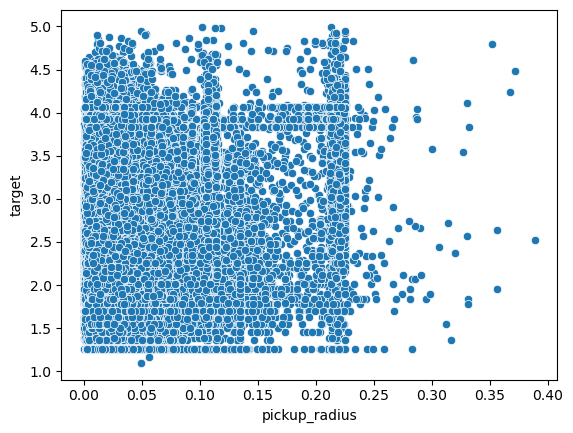

In [78]:
temp_df = X_train.copy()
temp_df['target'] = y_train

sns.scatterplot(data=temp_df, x='pickup_radius', y='target')

На расстоянии около `0.22` есть некоторое скопление точек, отделяемое от основное массы, за которым следуем резкий спад количества точек. Судя по карте, центр масс координат находится в Манхэттене, а резкий спад происходит, когда расстояние достигает океана. Рассмотрим подробнее это отдельное скопление.

<Axes: xlabel='target', ylabel='Count'>

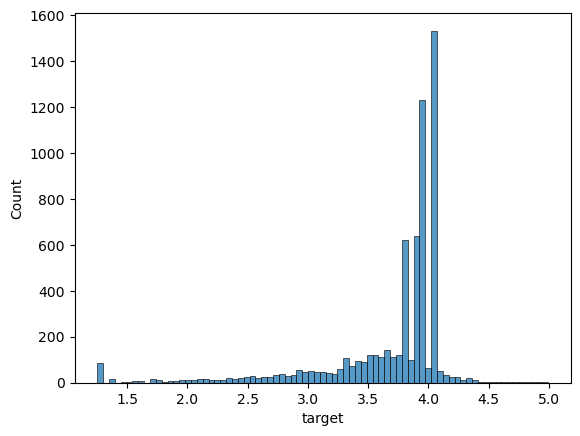

In [79]:
sns.histplot(data=temp_df.query('0.21 < pickup_radius < 0.23'), x='target')

По какой-то причине стоимость поездки для этого расстояния в среднем достаточно высокая (не учитывая сверхбольшое скопление точек возле цены = `4`). Посмотрим, как распределяются координаты посадки на этом расстоянии.

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

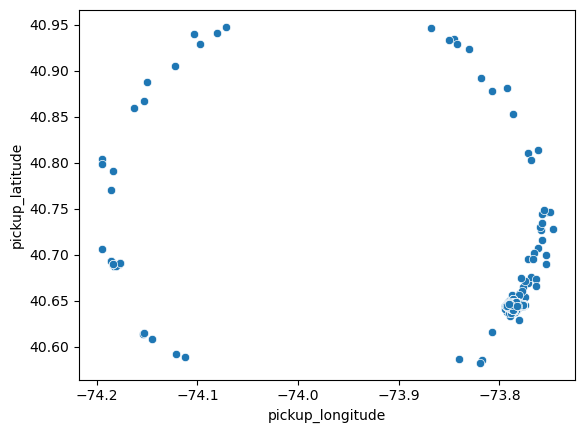

In [80]:
sns.scatterplot(data=temp_df.query('0.21 < pickup_radius < 0.23'), x='pickup_longitude', y='pickup_latitude')

Есть большое скопление точек в юго-восточной части. Анализ показывает, что в этом месте находится аэропорт Джона Кеннеди. Внизу показано распределение точек для этого аэропорта. Границы были тщательно подобраны.

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

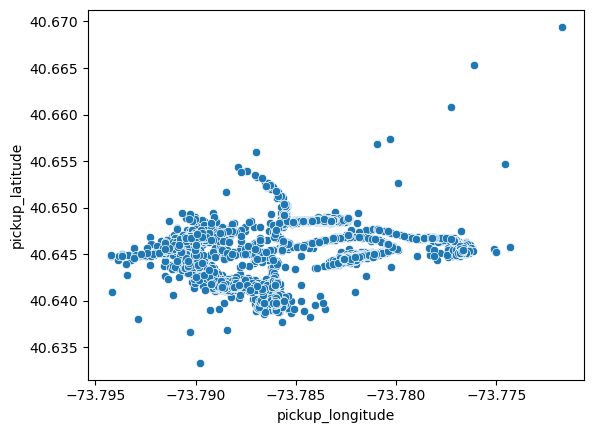

In [81]:
sns.scatterplot(data=temp_df.query('-73.81 < pickup_longitude < -73.77 & \
                                    40.63 < pickup_latitude < 40.67 & \
                                    0.21 < pickup_radius < 0.23'), x='pickup_longitude', y='pickup_latitude')

Видно, что точки распределяются по некоторым линиям, которые очень похожи на трассы идущие от аэропорта. Создадим новый признак - наличие аэропорта и посмотрим на результат предсказания без признака `pickup_radius`, который ухудшал результат.

In [40]:
X_train['airport_Kennedy'] = X_train[['pickup_longitude', 'pickup_latitude']].apply(
    lambda x: (-73.81 < x.iloc[0] < -73.77) & (40.63 < x.iloc[1] < 40.67), axis=1).astype(int)
X_test['airport_Kennedy'] = X_test[['pickup_longitude', 'pickup_latitude']].apply(
    lambda x: (-73.81 < x.iloc[0] < -73.77) & (40.63 < x.iloc[1] < 40.67), axis=1).astype(int)

In [83]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy.drop('pickup_radius', axis=1, inplace=True)
X_test_copy.drop('pickup_radius', axis=1, inplace=True)

model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
get_scores(model, X_train_copy, y_train, X_test_copy, y_test)

(0.8161930135120248, 0.8198883203548277)

Результат чуть ухудшился. Обновим признак, добавив наличие аэропорта на основе мест высадки.

In [41]:
X_train['airport_Kennedy'] = X_train[['dropoff_longitude', 'dropoff_latitude', 'airport_Kennedy']].apply(
    lambda x: 1 \
    if (-73.81 < x.iloc[0] < -73.77) & (40.63 < x.iloc[1] < 40.67) \
    else x.iloc[2], axis=1).astype(int)
X_test['airport_Kennedy'] = X_test[['dropoff_longitude', 'dropoff_latitude', 'airport_Kennedy']].apply(
    lambda x: 1 \
    if (-73.81 < x.iloc[0] < -73.77) & (40.63 < x.iloc[1] < 40.67) \
    else x.iloc[2], axis=1).astype(int)

In [85]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy.drop('pickup_radius', axis=1, inplace=True)
X_test_copy.drop('pickup_radius', axis=1, inplace=True)

model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
get_scores(model, X_train_copy, y_train, X_test_copy, y_test)

(0.8160777619715374, 0.8186989019167858)

Результат предсказания стал ещё хуже, но пока оставим, поскольку наличие аэропорта по общим соображениям достаточно важный признак.

Рассмотрим ещё один достаточно крупный аэропорт - Ла-Гуардия. Внизу показано распределение мест посадки для этого аэропорта.

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

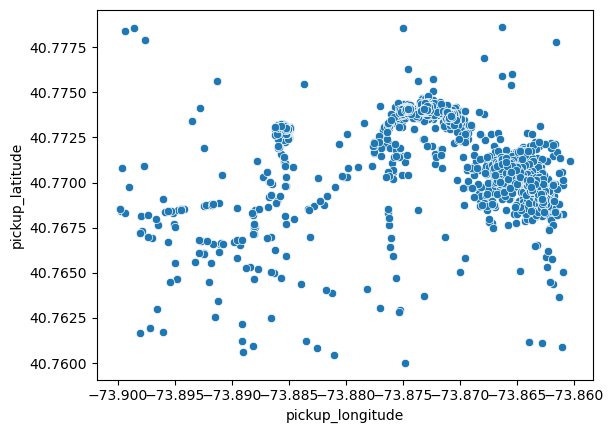

In [86]:
sns.scatterplot(data=temp_df.query('-73.90 < pickup_longitude < -73.86 & \
                                    40.76 < pickup_latitude < 40.78'), x='pickup_longitude', y='pickup_latitude')

Посмотрим на распределение стоимости для этого аэропорта.

<Axes: >

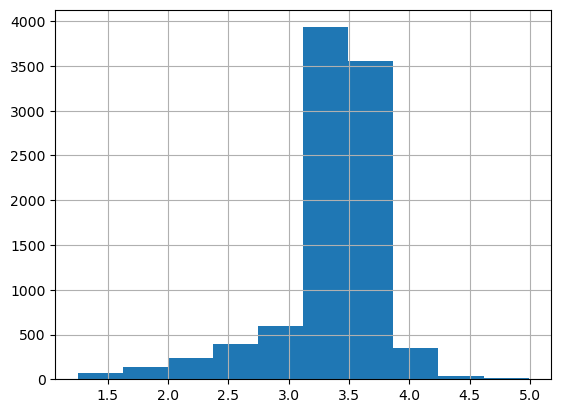

In [87]:
temp_df.query('-73.90 < pickup_longitude < -73.86 & \
                                    40.76 < pickup_latitude < 40.78')['target'].hist()

В среднем цена ниже, чем для аэропорта Джона Кеннеди. Поэтому лучше создадим ещё один признак.

In [42]:
X_train['airport_LaGuardia'] = X_train[['pickup_longitude', 'pickup_latitude']].apply(
    lambda x: (-73.9 < x.iloc[0] < -73.86) & (40.76 < x.iloc[1] < 40.78), axis=1).astype(int)
X_test['airport_LaGuardia'] = X_test[['pickup_longitude', 'pickup_latitude']].apply(
    lambda x: (-73.9 < x.iloc[0] < -73.86) & (40.76 < x.iloc[1] < 40.78), axis=1).astype(int)

In [43]:
X_train['airport_LaGuardia'] = X_train[['dropoff_longitude', 'dropoff_latitude', 'airport_LaGuardia']].apply(
    lambda x: 1 \
    if (-73.9 < x.iloc[0] < -73.86) & (40.76 < x.iloc[1] < 40.78) \
    else x.iloc[2], axis=1).astype(int)
X_test['airport_LaGuardia'] = X_test[['dropoff_longitude', 'dropoff_latitude', 'airport_LaGuardia']].apply(
    lambda x: 1 \
    if (-73.9 < x.iloc[0] < -73.86) & (40.76 < x.iloc[1] < 40.78) \
    else x.iloc[2], axis=1).astype(int)

In [90]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy.drop('pickup_radius', axis=1, inplace=True)
X_test_copy.drop('pickup_radius', axis=1, inplace=True)

model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
get_scores(model, X_train_copy, y_train, X_test_copy, y_test)

(0.8164949652741169, 0.8206881819753149)

Результат слегка улучшился после добавления двух аэропортов. Стоит отметить, что если учесть только аэропорт Ла-Гуардия, результат будет хуже, значит важно  учитывать оба аэропорта вместе.

Остальные аэропорты непопулярны и очень далеки от центра, поэтому не были добавлены.

Центр масс координат посадки и высадки находится в Манхэттене. Попробуем его учесть на основе расстояния до точек от центра масс. Поскольку Манхэттен неправильной формы и расстояние до его границ от центра меняется от 0.01 до 0.10, то возьмём такой радиус, который даёт наилучшее предсказание.

In [91]:
for thr in np.arange(0.01, 0.11, 0.01):
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    X_train_copy['is_Manhattan'] = X_train_copy['pickup_radius'].map(lambda x: int(x < thr))
    X_test_copy['is_Manhattan'] = X_test_copy['pickup_radius'].map(lambda x: int(x < thr))

    X_train_copy.drop('pickup_radius', axis=1, inplace=True)
    X_test_copy.drop('pickup_radius', axis=1, inplace=True)

    model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
    print(round(thr, 2), get_scores(model, X_train_copy, y_train, X_test_copy, y_test))

0.01 (0.8164854946340896, 0.8201974888696291)
0.02 (0.8166678811377392, 0.8200347506708379)
0.03 (0.8165131645686444, 0.820700670265547)
0.04 (0.816637812847498, 0.820241376612244)
0.05 (0.8164029599805167, 0.8201171424833719)
0.06 (0.8165568181656341, 0.8203594748617072)
0.07 (0.8165857600824746, 0.8204958685010904)
0.08 (0.8167196612421624, 0.8188242583927983)
0.09 (0.8166129557207648, 0.8187395175076737)
0.1 (0.816424620838234, 0.8187055418015045)


In [45]:
X_train['is_Manhattan'] = X_train['pickup_radius'].map(lambda x: int(x < 0.08))
X_test['is_Manhattan'] = X_test['pickup_radius'].map(lambda x: int(x < 0.08))

In [93]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
X_train_copy.drop('pickup_radius', axis=1, inplace=True)
X_test_copy.drop('pickup_radius', axis=1, inplace=True)

model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
get_scores(model, X_train_copy, y_train, X_test_copy, y_test)

(0.8167196612421624, 0.8188242583927983)

Создадим признак - удалённость от центра масс координат высадки пассажиров, и на основе этого признака также создадим признак наличия Манхэттена.

In [46]:
X_train['dropoff_radius'] = np.sqrt((X_train['dropoff_longitude'] - X_train['dropoff_longitude'].mean()) ** 2 + \
                      (X_train['dropoff_latitude'] - X_train['dropoff_latitude'].mean()) ** 2)
X_test['dropoff_radius'] = np.sqrt((X_test['dropoff_longitude'] - X_test['dropoff_longitude'].mean()) ** 2 + \
                      (X_test['dropoff_latitude'] - X_test['dropoff_latitude'].mean()) ** 2)

In [95]:
for thr in np.arange(0.01, 0.11, 0.01):
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()

    X_train_copy['is_Manhattan_dropoff'] = X_train_copy['dropoff_radius'].map(lambda x: int(x < thr))
    X_test_copy['is_Manhattan_dropoff'] = X_test_copy['dropoff_radius'].map(lambda x: int(x < thr))

    X_train_copy.drop(['pickup_radius', 'dropoff_radius'], axis=1, inplace=True)
    X_test_copy.drop(['pickup_radius', 'dropoff_radius'], axis=1, inplace=True)

    model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
    print(round(thr, 2), get_scores(model, X_train_copy, y_train, X_test_copy, y_test))

0.01 (0.8168971682007301, 0.8185155298226369)
0.02 (0.8169395583300123, 0.8190082384318835)
0.03 (0.8170192749287117, 0.8185396258308109)
0.04 (0.8168913984456804, 0.8186239697248308)
0.05 (0.8169031915098366, 0.819276300744808)
0.06 (0.8168817023778936, 0.8191569870688268)
0.07 (0.8171136716246313, 0.8186144017274286)
0.08 (0.8168629449783363, 0.8180804640728937)
0.09 (0.8168509602127185, 0.819496713781941)
0.1 (0.8169179612807678, 0.8189026643108545)


In [47]:
X_train['is_Manhattan_dropoff'] = X_train['dropoff_radius'].map(lambda x: int(x < 0.07))
X_test['is_Manhattan_dropoff'] = X_test['dropoff_radius'].map(lambda x: int(x < 0.07))

Признаки `pickup_radius` и `dropoff_radius` ухудшают результаты и больше не нужны. Удалим их.

In [48]:
X_train.drop(['pickup_radius', 'dropoff_radius'], axis=1, inplace=True)
X_test.drop(['pickup_radius', 'dropoff_radius'], axis=1, inplace=True)

In [50]:
model = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
get_scores(model, X_train, y_train, X_test, y_test)

(0.8171136716246313, 0.8186144017274286)

Вывод:
В ходе работы над созданием новых признаков удалось улучшить результат предсказания на тестовых данных с `R2` = `0.578` до `R2` = `0.817` на кросс-валидации и с `R2` = `0.722` до `R2` = `0.819` на тестовых данных.

Были созданы признаки:

`distance` - расстояние между координатами посадки и координатами высадки пассажиров.

`year_month` - время, выраженное в годах и месяцах.

`year_month_type` - типы периодов времени на основе `year_month`.

`morning` - признак, указывающий на время 5 утра.

`airport_LaGuardia` - наличие аэропорта Ла-Гуардия вблизи мест высадки и посадки.

`airport_Kennedy` - наличие аэропорта Джона Кеннеди вблизи мест высадки и посадки.

`is_Manhattan` - признак, указывающий на место посадки в Манхэттене.

`is_Manhattan_dropoff` - признак, указывающий на место высадки в Манхэттене.

## Отбор признаков

Попробуем отбирать признаки из датасета с помощью различных метрик важности признаков: важность признаков дерева, взаимная информация и рекуррентным способом с помощью `RFE`.

In [52]:
from tqdm import tqdm

Напишем функцию, выдающую результаты предсказания для исходного набора признаков, при удалении наименее важного, двух наименее важных и т.д.

In [53]:
def scores_by_cnt(estimator, importances, Xtrain, Xtest, ytrain, ytest):
    scores = []
    importances_sort = np.argsort(importances)
    for features_part in tqdm(range(Xtrain.shape[1])):
        X_train_part = Xtrain.iloc[:, importances_sort[features_part:]]
        X_test_part = Xtest.iloc[:, importances_sort[features_part:]]
        scores_ = get_scores(estimator, X_train_part, ytrain, X_test_part, ytest)
        scores.append(scores_)
    return scores

Сначала будем отбирать признаки с наименьшей важностью с точки зрения дерева.

In [138]:
tree = DecisionTreeRegressor(max_depth=10, random_state=RANDOM_STATE)
tree.fit(X_train, y_train)

f_importances = tree.feature_importances_
scores_by_tree = scores_by_cnt(tree, f_importances, X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [04:13<00:00, 16.88s/it]


C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '$R^2$')

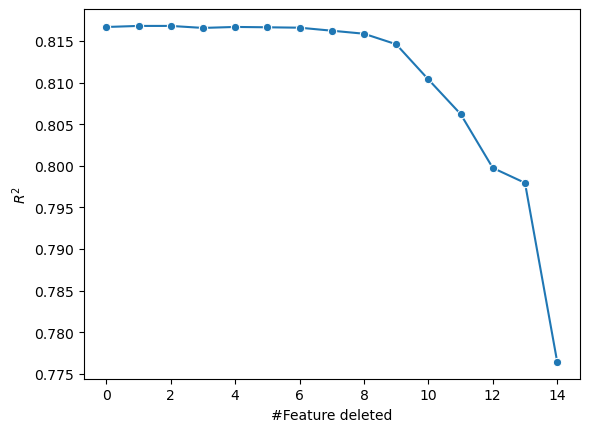

In [140]:
sns.lineplot(x=list(range(X_train.shape[1])), y=np.array(scores_by_tree)[:, 0], marker='o')
plt.xlabel('#Feature deleted')
plt.ylabel('$R^2$')

При удалении наименее важных признаков с точки зрения дерева, точность почти не меняется, пока не будет удалено слишком много признаков и точность не упадёт.

Теперь отберём признаки с наименьшими значениями коэффициента корреляции Пирсона признаков с целевой переменной. Затем по степени взаимной информации.

In [141]:
from scipy.stats import pearsonr

In [142]:
corrs = np.abs([pearsonr(X_train.iloc[:, i], y_train)[0] for i in range(X_train.shape[1])])

scores_by_pearson = scores_by_cnt(tree, corrs, X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [03:42<00:00, 14.83s/it]


C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '$R^2$')

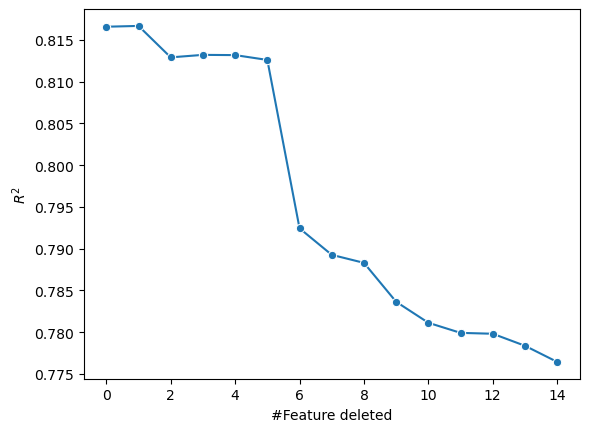

In [144]:
sns.lineplot(x=list(range(X_train.shape[1])), y=np.array(scores_by_pearson)[:, 0], marker='o')
plt.xlabel('#Feature deleted')
plt.ylabel('$R^2$')

In [49]:
from sklearn.feature_selection import mutual_info_regression

In [146]:
mi = mutual_info_regression(X_train, y_train)

scores_by_mi = scores_by_cnt(tree, mi, X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [04:13<00:00, 16.89s/it]


C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '$R^2$')

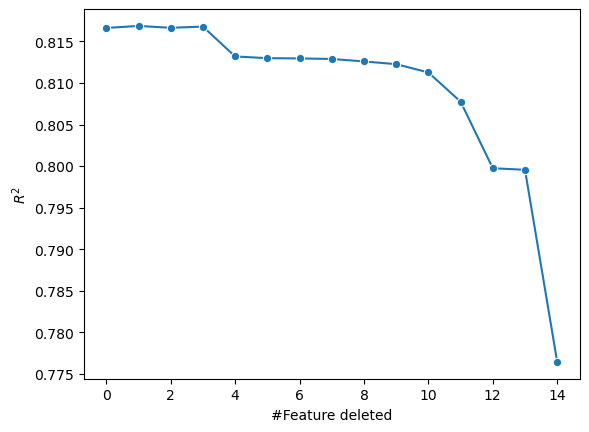

In [148]:
sns.lineplot(x=list(range(X_train.shape[1])), y=np.array(scores_by_mi)[:, 0], marker='o')
plt.xlabel('#Feature deleted')
plt.ylabel('$R^2$')

Результаты не улучшились. Попробуем рекурсивный отбор признаков.

In [149]:
from sklearn.feature_selection import RFE

In [150]:
def scores_by_rfe(estimator, Xtrain, Xtest, ytrain, ytest):
    scores = []
    for num_features in tqdm(range(Xtrain.shape[1], 0, -1)):
        selector = RFE(estimator, n_features_to_select=num_features, step=1)
        selector = selector.fit(Xtrain, ytrain)

        X_train_part = selector.transform(Xtrain)
        X_test_part = selector.transform(Xtest)
        scores_ = get_scores(estimator, X_train_part, ytrain, X_test_part, ytest)
        scores.append(scores_)
    return scores

In [151]:
scores_by_RFE = scores_by_rfe(tree, X_train, X_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [15:33<00:00, 62.23s/it]


C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, '$R^2$')

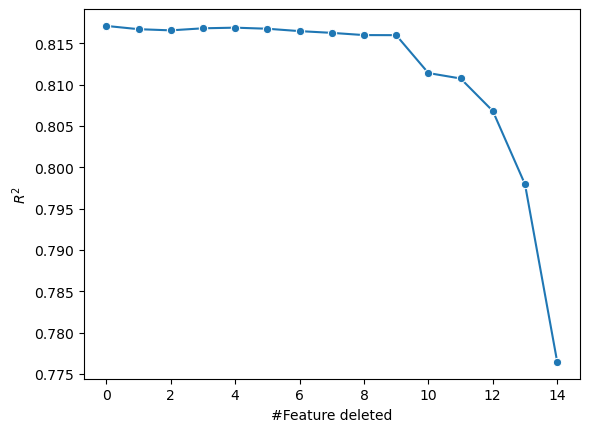

In [153]:
sns.lineplot(x=list(range(X_train.shape[1])), y=np.array(scores_by_RFE)[:, 0], marker='o')
plt.xlabel('#Feature deleted')
plt.ylabel('$R^2$')

Отбор признаков не улучшил результат, поэтому оставим все признаки.

## Построение Pipeline

В этом разделе рассмотрим другие модели, и построим пайплайны, состоящие из `PolynomialFeatures` для создания новых признаков, отбора признаков с помощью разных инструментов, и наилучшей модели.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

Сначала посмотрим на результат предсказания случайного леса с подобранными гиперпараметрами.

Здесь и далее поиск гиперпараметров осуществляется на малой выборке, так как исходная выборка очень большая и поиск гиперпараметров может занять несколько суток. Затем наилучшая модель обучается на всей выборке с получением предсказания.

In [115]:
grid_cv.best_score_

0.8144664142003223

In [116]:
best_model = grid_cv.best_estimator_

In [117]:
get_scores(best_model, X_train, y_train, X_test, y_test)

(0.8371600389401959, 0.8369890175303327)

Результат лучше, чем для дерева.

Установим библиотеки моделей бустинга: `XGBoost` и `CatBoost`.

In [52]:
!pip install -q xgboost
!pip install -q catboost

Посмотрим на результат предсказания XGBoostRegressor с подобранными гиперпараметрами.

In [53]:
from xgboost import XGBRegressor

In [63]:
%%time
xgb_model = XGBRegressor(random_state=RANDOM_STATE, verbosity=0)


params = {'n_estimators': [700, 800, 900, 1000, 1100],
          'max_depth': range(3, 6),
          'learning_rate': np.arange(0.006, 0.023, 0.004),
          'subsample': np.arange(0.9, 1.05, 0.1)}

grid_cv = GridSearchCV(xgb_model, param_grid=params, cv=4, scoring='r2', verbose=2)
grid_cv.fit(X_train.iloc[:10000], y_train.iloc[:10000])

print(grid_cv.best_params_)
print(grid_cv.best_score_)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
[CV] END learning_rate=0.006, max_depth=3, n_estimators=700, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=700, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=700, subsample=0.9; total time=   0.6s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=700, subsample=0.9; total time=   0.5s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=700, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=700, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=700, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=700, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=800, subsample=0.9; total time=   0.7s
[CV] END learning_rate=0.006, max_depth=3, n_estimators=800, subsample=0.9; total 

[CV] END learning_rate=0.006, max_depth=5, n_estimators=700, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=700, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=800, subsample=0.9; total time=   1.2s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=800, subsample=0.9; total time=   1.2s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=800, subsample=0.9; total time=   1.3s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=800, subsample=0.9; total time=   1.2s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=800, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=800, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=800, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.006, max_depth=5, n_estimators=800, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.006, max_depth=5, n_estim

[CV] END learning_rate=0.01, max_depth=4, n_estimators=800, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=800, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=800, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=900, subsample=0.9; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=900, subsample=0.9; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=900, subsample=0.9; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=900, subsample=0.9; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=900, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=900, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=900, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=900, 

[CV] END learning_rate=0.014, max_depth=3, n_estimators=900, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=900, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=900, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=900, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=1000, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=1000, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=1000, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=1000, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.014, max_depth=3, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.014, max_depth=3, n

[CV] END learning_rate=0.014, max_depth=5, n_estimators=1000, subsample=0.9; total time=   1.4s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1000, subsample=0.9; total time=   1.6s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1000, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1100, subsample=0.9; total time=   1.7s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1100, subsample=0.9; total time=   1.6s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1100, subsample=0.9; total time=   1.7s
[CV] END learning_rate=0.014, max_depth=5, n_estimators=1100, subsample=0.9; total time=   2.2s
[CV] END learning_rate=0.014, max_depth=

[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=900, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=1000, subsample=0.9; total time=   1.0s
[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=1000, subsample=0.9; total time=   1.2s
[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=1000, subsample=0.9; total time=   1.1s
[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=1000, subsample=0.9; total time=   1.1s
[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=1000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=1000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=1000, subsample=1.0; total time=   0.9s
[CV] END learning_rate=0.018000000000000002, max_depth=4, n_estimators=1000, subsample=1.0; total time=   0.9s
[C

[CV] END learning_rate=0.022, max_depth=3, n_estimators=900, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=900, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=900, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=900, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=1000, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=1000, subsample=0.9; total time=   0.8s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=1000, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=1000, subsample=0.9; total time=   0.9s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.022, max_depth=3, n_estimators=1000, subsample=1.0; total time=   0.7s
[CV] END learning_rate=0.022, max_depth=3, n

[CV] END learning_rate=0.022, max_depth=5, n_estimators=1000, subsample=0.9; total time=   1.5s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1000, subsample=0.9; total time=   1.5s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1000, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1000, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1000, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1100, subsample=0.9; total time=   1.7s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1100, subsample=0.9; total time=   1.7s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1100, subsample=0.9; total time=   1.7s
[CV] END learning_rate=0.022, max_depth=5, n_estimators=1100, subsample=0.9; total time=   1.7s
[CV] END learning_rate=0.022, max_depth=

C:\Users\vasil\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'learning_rate': 0.014, 'max_depth': 4, 'n_estimators': 900, 'subsample': 1.0}
0.8199082599532397
CPU times: total: 39min 33s
Wall time: 10min 56s


In [64]:
best_model = XGBRegressor(**{'learning_rate': 0.014, 
                             'max_depth': 4, 
                             'n_estimators': 900, 
                             'subsample': 1.0}, 
                          random_state=RANDOM_STATE, verbosity=0)
get_scores(best_model, X_train, y_train, X_test, y_test)

(0.8319750387735767, 0.8264534448175175)

Результат хуже, чем у случайного леса.

Рассмотрим CatBoostRegressor.

In [54]:
from catboost import CatBoostRegressor

In [166]:
%%time
cat_model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)


params = {'n_estimators': [600, 700, 800],
          'learning_rate': np.arange(0.02, 0.061, 0.01),
          'max_depth': range(4, 9),
          'l2_leaf_reg': range(1, 5)}

grid_cv = GridSearchCV(cat_model, param_grid=params, cv=4, scoring='r2', verbose=2)
grid_cv.fit(X_train.iloc[:10000], y_train.iloc[:10000])

print(grid_cv.best_params_)
print(grid_cv.best_score_)

Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=   2.0s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=   1.9s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=   1.9s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=   1.9s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=700; total time=   2.2s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=700; total time=   2.2s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=700; total time=   2.2s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=700; total time=   2.2s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=800; total time=   2.5s
[CV] END l2_leaf_reg=1, learning_rate=0.02, max_depth=4, n_estimators=800; total time=   2

[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=600; total time=   3.1s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=700; total time=   3.6s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=700; total time=   3.6s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=700; total time=   3.6s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=700; total time=   3.6s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=800; total time=   4.1s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=800; total time=   4.2s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=800; total time=   4.2s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=6, n_estimators=800; total time=   4.2s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=7, n_estimators=600; total time=   4.4s
[CV] END l2_leaf_reg=1, learning_rate=0.03, max_depth=7, n_e

[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=7, n_estimators=800; total time=   5.8s
[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=8, n_estimators=600; total time=   6.8s
[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=8, n_estimators=600; total time=   6.9s
[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=8, n_estimators=600; total time=   6.9s
[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=8, n_estimators=600; total time=   6.9s
[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=8, n_estimators=700; total time=   8.0s
[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=8, n_estimators=700; total time=   8.0s
[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=8, n_estimators=700; total time=   8.0s
[CV] END l2_leaf_reg=1, learning_rate=0.039999999999999994, max_depth=8, n_estimators=700; total time=   8.0s
[CV] END l

[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=600; total time=   1.8s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=600; total time=   1.8s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=800; total time=   2.4s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=800; total time=   2.4s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=800; total time=   2.4s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=4, n_estimators=800; total time=   2.4s
[CV] END l2_leaf_reg=1, learning_rate=0.06, max_depth=5, n_e

[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=6, n_estimators=700; total time=   3.4s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=6, n_estimators=700; total time=   3.4s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=6, n_estimators=800; total time=   3.9s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=6, n_estimators=800; total time=   3.9s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=6, n_estimators=800; total time=   3.9s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=6, n_estimators=800; total time=   4.0s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=600; total time=   4.2s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=600; total time=   4.3s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=600; total time=   4.2s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=600; total time=   4.3s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_e

[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=8, n_estimators=800; total time=   9.3s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=8, n_estimators=800; total time=   9.3s
[CV] END l2_leaf_reg=2, learning_rate=0.039999999999999994, max_depth=4, n_estimators=600; total time=   1.8s
[CV] END l2_leaf_reg=2, learning_rate=0.039999999999999994, max_depth=4, n_estimators=600; total time=   1.8s
[CV] END l2_leaf_reg=2, learning_rate=0.039999999999999994, max_depth=4, n_estimators=600; total time=   1.8s
[CV] END l2_leaf_reg=2, learning_rate=0.039999999999999994, max_depth=4, n_estimators=600; total time=   1.8s
[CV] END l2_leaf_reg=2, learning_rate=0.039999999999999994, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=2, learning_rate=0.039999999999999994, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=2, learning_rate=0.039999999999999994, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=2, learning_rate=0.03

[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=600; total time=   2.3s
[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=600; total time=   2.3s
[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=600; total time=   2.3s
[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=700; total time=   2.7s
[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=700; total time=   2.7s
[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=700; total time=   2.7s
[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=700; total time=   2.7s
[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=800; total time=   3.1s
[CV] END l2_leaf_reg=2, learning_rate=0.049999999999999996, max_depth=5, n_estimators=800; total time=   3.1s
[CV] END l

[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=6, n_estimators=800; total time=   4.2s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=6, n_estimators=800; total time=   4.1s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=6, n_estimators=800; total time=   4.2s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=7, n_estimators=600; total time=   4.5s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=7, n_estimators=600; total time=   4.5s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=7, n_estimators=600; total time=   4.5s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=7, n_estimators=600; total time=   4.4s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=7, n_estimators=700; total time=   5.3s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=7, n_estimators=700; total time=   5.2s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=7, n_estimators=700; total time=   5.2s
[CV] END l2_leaf_reg=2, learning_rate=0.06, max_depth=7, n_e

[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=600; total time=   1.8s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=600; total time=   1.8s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=600; total time=   1.7s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=700; total time=   2.0s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=800; total time=   2.3s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=800; total time=   2.3s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=800; total time=   2.4s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_e

[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=600; total time=   3.1s
[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=600; total time=   3.1s
[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=600; total time=   3.1s
[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=700; total time=   3.6s
[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=700; total time=   3.6s
[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=700; total time=   3.6s
[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=700; total time=   3.7s
[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=800; total time=   4.2s
[CV] END l2_leaf_reg=3, learning_rate=0.039999999999999994, max_depth=6, n_estimators=800; total time=   4.0s
[CV] END l

[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=7, n_estimators=700; total time=   5.0s
[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=7, n_estimators=700; total time=   5.0s
[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=7, n_estimators=700; total time=   4.9s
[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=7, n_estimators=700; total time=   5.0s
[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=7, n_estimators=800; total time=   5.7s
[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=7, n_estimators=800; total time=   5.8s
[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=7, n_estimators=800; total time=   5.8s
[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=7, n_estimators=800; total time=   5.8s
[CV] END l2_leaf_reg=3, learning_rate=0.049999999999999996, max_depth=8, n_estimators=600; total time=   6.8s
[CV] END l

[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=4, n_estimators=700; total time=   2.2s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=4, n_estimators=800; total time=   2.5s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=4, n_estimators=800; total time=   2.5s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=4, n_estimators=800; total time=   2.5s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=4, n_estimators=800; total time=   2.4s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=600; total time=   2.3s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=600; total time=   2.3s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_e

[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=6, n_estimators=800; total time=   3.9s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=6, n_estimators=800; total time=   4.1s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=6, n_estimators=800; total time=   4.0s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=6, n_estimators=800; total time=   4.0s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=600; total time=   4.3s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=600; total time=   4.4s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=600; total time=   4.6s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=600; total time=   4.4s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=700; total time=   4.9s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=700; total time=   4.9s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_e

[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=600; total time=   6.4s
[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=700; total time=   7.8s
[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=700; total time=   7.9s
[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=700; total time=   7.8s
[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=700; total time=   7.9s
[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=800; total time=   9.1s
[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=800; total time=   9.2s
[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=800; total time=   9.1s
[CV] END l2_leaf_reg=4, learning_rate=0.039999999999999994, max_depth=8, n_estimators=800; total time=   9.0s
[CV] END l

[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=4, n_estimators=700; total time=   2.1s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=4, n_estimators=800; total time=   2.4s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=4, n_estimators=800; total time=   2.4s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=4, n_estimators=800; total time=   2.3s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=4, n_estimators=800; total time=   2.3s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=5, n_estimators=600; total time=   2.1s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=5, n_estimators=600; total time=   2.3s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=5, n_estimators=600; total time=   2.3s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=5, n_estimators=600; total time=   2.3s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=5, n_estimators=700; total time=   2.6s
[CV] END l2_leaf_reg=4, learning_rate=0.06, max_depth=5, n_e

In [167]:
best_model = CatBoostRegressor(**{'l2_leaf_reg': 3,
                                  'learning_rate': 0.04,
                                  'max_depth': 6,
                                  'n_estimators': 700},
                               random_state=RANDOM_STATE, verbose=0)
get_scores(best_model, X_train, y_train, X_test, y_test)

(0.8406881587447445, 0.8354925870220601)

Результат лучше, чем у случайного леса.

Теперь рассмотрим различные пайплайны с участием CatBoostRegressor.

Сначала найдём количество признаков с наивысшими значениями важности для модели с параметрами по умолчанию. Затем зафиксируем количество признаков, дающее наилучший результат, и найдём оптимальные значения гиперпараметров модели.

In [67]:
for n in np.arange(100, 5, -5):
    p = Pipeline([
              ('poly_features', PolynomialFeatures(include_bias=False)),
              ('selector', SelectFromModel(DecisionTreeRegressor(max_depth=10,
                                                                 random_state=RANDOM_STATE),
                                           threshold=-np.inf, max_features=n))
              ])

    X_train_new = p.fit_transform(X_train, y_train)
    X_test_new = p.transform(X_test)
    model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)

    print(n, get_scores(model, X_train_new, y_train, X_test_new, y_test))

100 (0.8477708486430221, 0.8459305923540493)
95 (0.847878581798144, 0.8464764646164866)
90 (0.8477168748934927, 0.8466455455434366)
85 (0.8478373525400078, 0.8464802958044386)
80 (0.8480152935849418, 0.8466363725560642)
75 (0.847989652248573, 0.8458970556369277)
70 (0.8478051812201273, 0.8465691192920011)
65 (0.8481182534000624, 0.8464724508108907)
60 (0.8479684942801073, 0.8456417110686576)
55 (0.8469942216166202, 0.8445042864418051)
50 (0.8472938772268257, 0.8453671202981657)
45 (0.8469043162653794, 0.8451692855737388)
40 (0.8470985781680398, 0.8429060073932215)
35 (0.8471056237977743, 0.8441162538893867)
30 (0.8458163909224206, 0.8423478239496581)
25 (0.8445404659937268, 0.8413526861925271)
20 (0.8436829226694769, 0.8411888139547268)
15 (0.8439293775163457, 0.8400708265936576)
10 (0.8294440741937772, 0.8261603922647656)


Наилучший результат предсказания получен при 65 признаках.

Для экономии времени поиска гиперпараметров один раз преобразуем признаки, затем найдём оптимальные значения гиперпараметров.

In [55]:
p_best = Pipeline([
              ('poly_features', PolynomialFeatures(include_bias=False)),
              ('selector', SelectFromModel(DecisionTreeRegressor(max_depth=10,
                                                                 random_state=RANDOM_STATE),
                                           threshold=-np.inf, max_features=65))
              ])

X_train_new = p_best.fit_transform(X_train, y_train)
X_test_new = p_best.transform(X_test)

In [73]:
%%time
cat_model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)

params = {'n_estimators': [1300, 1500, 1700],
          'learning_rate': np.arange(0.03, 0.041, 0.01),
          'max_depth': range(7, 10),
          'l2_leaf_reg': range(4, 5)}

grid_cv = GridSearchCV(cat_model, param_grid=params, cv=4, scoring='r2', verbose=2)
grid_cv.fit(X_train_new[:10000], y_train.iloc[:10000])

print(grid_cv.best_params_)
print(grid_cv.best_score_)

Fitting 4 folds for each of 18 candidates, totalling 72 fits
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1300; total time=  49.7s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1300; total time=  49.7s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1300; total time=  49.6s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1300; total time=  49.7s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  57.6s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  57.5s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  57.5s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  57.4s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1700; total time= 1.1min
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=7, n_estimators=1700; total ti

In [56]:
best_model_for_p = CatBoostRegressor(**{'l2_leaf_reg': 4,
                                         'learning_rate': 0.03,
                                         'max_depth': 8,
                                         'n_estimators': 1500},
                                          random_state=RANDOM_STATE, verbose=0)

get_scores(best_model_for_p, X_train_new, y_train, X_test_new, y_test)

(0.8481107464773873, 0.8465884867144985)

С использованием создания и отбора признаков пайплайн показал более хороший результат.

Заменим инструмент отбора признаков на `SelectKBest`, использовав в качестве функции оценки признаков `mutual_info_regression`.

In [57]:
for n in range(100, 5, -5):
    preproc = Pipeline([
              ('poly_features', PolynomialFeatures(include_bias=False)),
              ('selector', SelectKBest(score_func=mutual_info_regression, k=n))
              ])
    X_train_new = preproc.fit_transform(X_train, y_train)
    X_test_new = preproc.transform(X_test)

    model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)

    print(n, get_scores(model, X_train_new, y_train, X_test_new, y_test))

100 (0.8482572049016959, 0.8472541964601529)
95 (0.8483018127273231, 0.846964014774308)
90 (0.8477693015793227, 0.8450898076281029)
85 (0.8479472368926815, 0.8458620444434021)
80 (0.8477742642254822, 0.8463291281112326)
75 (0.8480019962375752, 0.8468604277977956)
70 (0.8480560091843387, 0.8451726381272987)
65 (0.8483589939047592, 0.8454642601922915)
60 (0.8467000289541313, 0.8446711845509924)
55 (0.8468662942389047, 0.8437218036414491)
50 (0.8468744451690859, 0.8445450132427162)
45 (0.8466402315024364, 0.8434468729896123)
40 (0.8424854019246729, 0.8376811168272481)
35 (0.8368593766837098, 0.8322394574136266)
30 (0.8368152375164607, 0.8320398499913529)
25 (0.8370252889164996, 0.831978772586437)
20 (0.8296788836434286, 0.8288153204926919)
15 (0.8257722497887802, 0.8267198204524934)
10 (0.8043672579264058, 0.7932421544368582)


Лучший результат достигается при 65 признаках.

Найдём оптимальные значения гиперпараметров.

In [58]:
p_best2 = Pipeline([
                  ('poly_features', PolynomialFeatures(include_bias=False)),
                  ('selector', SelectKBest(score_func=mutual_info_regression, k=65))
                  ])
X_train_new = p_best2.fit_transform(X_train, y_train)
X_train_new = pd.DataFrame(X_train_new, columns=p_best2.named_steps['selector'].get_feature_names_out())
X_test_new = p_best2.transform(X_test)

In [62]:
%%time
cat_model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)

params = {'n_estimators': range(1400, 1900, 100),
          'learning_rate': np.arange(0.01, 0.051, 0.01),
          'max_depth': range(4, 9),
          'l2_leaf_reg': range(2, 7)}

grid_cv = GridSearchCV(cat_model, param_grid=params, cv=4, scoring='r2', verbose=2)
grid_cv.fit(X_train_new[:10000], y_train.iloc[:10000])

print(grid_cv.best_params_)
print(grid_cv.best_score_)

Fitting 4 folds for each of 625 candidates, totalling 2500 fits
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1400; total time=  11.5s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1400; total time=  11.6s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1400; total time=  11.5s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1400; total time=  11.6s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=  12.3s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=  12.3s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=  12.4s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=  12.3s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1600; total time=  13.1s
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=4, n_estimators=1600; total

[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1500; total time= 1.5min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1500; total time= 1.5min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1700; total time= 1.8min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=2, learning_rate=0.01, max_de

[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=1700; total time=  57.1s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=1700; total time=  57.1s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=1700; total time=  57.2s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=1800; total time= 1.0min
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=1800; total time= 1.0min
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=1800; total time= 1.0min
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=7, n_estimators=1800; total time=  59.8s
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=2, learning_rate=0.02, max_de

[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1400; total time=  47.7s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1400; total time=  47.8s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1400; total time=  47.8s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1400; total time=  47.6s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  51.2s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  51.2s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  51.4s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  51.3s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1600; total time=  54.5s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_depth=7, n_estimators=1600; total time=  54.7s
[CV] END l2_leaf_reg=2, learning_rate=0.03, max_de

[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1500; total time=  29.9s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1600; total time=  32.0s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1600; total time=  31.9s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1600; total time=  32.0s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1600; total time=  31.9s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1700; total time=  34.0s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1700; total time=  33.8s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1700; total time=  33.8s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1700; total time=  34.1s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_depth=6, n_estimators=1800; total time=  35.9s
[CV] END l2_leaf_reg=2, learning_rate=0.04, max_de

[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=5, n_estimators=1700; total time=  21.3s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=5, n_estimators=1700; total time=  21.2s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=5, n_estimators=1800; total time=  22.5s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=5, n_estimators=1800; total time=  22.3s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=5, n_estimators=1800; total time=  22.4s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=5, n_estimators=1800; total time=  22.5s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=6, n_estimators=1400; total time=  27.8s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=6, n_estimators=1400; total time=  27.9s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=6, n_estimators=1400; total time=  27.8s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_depth=6, n_estimators=1400; total time=  28.1s
[CV] END l2_leaf_reg=2, learning_rate=0.05, max_de

[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1400; total time=  17.5s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1400; total time=  17.4s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1400; total time=  17.3s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1500; total time=  18.6s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1500; total time=  18.7s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1500; total time=  18.6s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1500; total time=  18.7s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1600; total time=  19.9s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1600; total time=  19.8s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_depth=5, n_estimators=1600; total time=  19.9s
[CV] END l2_leaf_reg=3, learning_rate=0.01, max_de

[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1600; total time=  13.2s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1600; total time=  13.2s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1600; total time=  13.2s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1600; total time=  13.2s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1700; total time=  13.9s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1700; total time=  14.1s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1700; total time=  14.0s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1700; total time=  13.9s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1800; total time=  14.7s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=4, n_estimators=1800; total time=  14.8s
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_de

[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=8, n_estimators=1800; total time= 1.9min
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=8, n_estimators=1800; total time= 1.9min
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=8, n_estimators=1800; total time= 1.8min
[CV] END l2_leaf_reg=3, learning_rate=0.02, max_depth=8, n_estimators=1800; total time= 1.9min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=1400; total time=  11.5s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=1400; total time=  11.5s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=1400; total time=  11.4s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=1400; total time=  11.4s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=4, n_estimators=1500; total time=  12.3s
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_de

[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1500; total time= 1.4min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1500; total time= 1.4min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1500; total time= 1.4min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1500; total time= 1.4min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1600; total time= 1.5min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1600; total time= 1.5min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_depth=8, n_estimators=1600; total time= 1.5min
[CV] END l2_leaf_reg=3, learning_rate=0.03, max_de

[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1600; total time=  51.2s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1600; total time=  49.0s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1600; total time=  51.5s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1700; total time=  53.9s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1700; total time=  54.2s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1700; total time=  55.3s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1700; total time=  56.2s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1800; total time=  56.8s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1800; total time=  58.1s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_depth=7, n_estimators=1800; total time=  57.6s
[CV] END l2_leaf_reg=3, learning_rate=0.04, max_de

[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=6, n_estimators=1800; total time=  35.3s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=6, n_estimators=1800; total time=  35.5s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=6, n_estimators=1800; total time=  35.6s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=6, n_estimators=1800; total time=  35.2s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=7, n_estimators=1400; total time=  45.7s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=7, n_estimators=1400; total time=  45.0s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=7, n_estimators=1400; total time=  46.8s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=7, n_estimators=1400; total time=  47.3s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=7, n_estimators=1500; total time=  51.1s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_depth=7, n_estimators=1500; total time=  50.7s
[CV] END l2_leaf_reg=3, learning_rate=0.05, max_de

[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1400; total time=  27.9s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  29.7s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  29.6s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  29.6s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1500; total time=  29.3s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1600; total time=  31.2s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1600; total time=  31.5s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1600; total time=  30.3s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1600; total time=  31.0s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_depth=6, n_estimators=1700; total time=  33.1s
[CV] END l2_leaf_reg=4, learning_rate=0.01, max_de

[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1600; total time=  20.0s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1600; total time=  19.9s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1700; total time=  21.1s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1700; total time=  21.2s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1700; total time=  21.1s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1700; total time=  21.1s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1800; total time=  22.3s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1800; total time=  22.8s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1800; total time=  22.5s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_depth=5, n_estimators=1800; total time=  22.5s
[CV] END l2_leaf_reg=4, learning_rate=0.02, max_de

[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=4, n_estimators=1800; total time=  15.1s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=4, n_estimators=1800; total time=  14.7s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=4, n_estimators=1800; total time=  14.8s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=5, n_estimators=1400; total time=  17.5s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=5, n_estimators=1400; total time=  17.5s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=5, n_estimators=1400; total time=  17.4s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=5, n_estimators=1400; total time=  17.4s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=5, n_estimators=1500; total time=  18.1s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=5, n_estimators=1500; total time=  18.4s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_depth=5, n_estimators=1500; total time=  17.1s
[CV] END l2_leaf_reg=4, learning_rate=0.03, max_de

[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1500; total time=  12.2s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1500; total time=  12.3s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1500; total time=  12.2s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1500; total time=  12.2s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1600; total time=  13.0s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1600; total time=  13.1s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1600; total time=  13.0s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1600; total time=  13.1s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1700; total time=  13.8s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=4, n_estimators=1700; total time=  13.9s
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_de

[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1800; total time= 1.8min
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1800; total time= 1.8min
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1800; total time= 1.8min
[CV] END l2_leaf_reg=4, learning_rate=0.04, max_depth=8, n_estimators=1800; total time= 1.8min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=4, n_estimators=1400; total time=  10.9s
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_de

[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=7, n_estimators=1800; total time=  59.7s
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=7, n_estimators=1800; total time=  60.0s
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=8, n_estimators=1500; total time= 1.5min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=8, n_estimators=1500; total time= 1.5min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=8, n_estimators=1500; total time= 1.5min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_depth=8, n_estimators=1500; total time= 1.5min
[CV] END l2_leaf_reg=4, learning_rate=0.05, max_de

[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1500; total time=  49.4s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1500; total time=  49.4s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1500; total time=  49.6s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1600; total time=  52.7s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1600; total time=  50.6s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1600; total time=  47.1s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1600; total time=  46.9s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1700; total time=  51.6s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1700; total time=  52.9s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_depth=7, n_estimators=1700; total time=  53.6s
[CV] END l2_leaf_reg=5, learning_rate=0.01, max_de

[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=6, n_estimators=1700; total time=  32.8s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=6, n_estimators=1700; total time=  32.9s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=6, n_estimators=1700; total time=  33.0s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=6, n_estimators=1700; total time=  33.0s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=6, n_estimators=1800; total time=  35.0s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=6, n_estimators=1800; total time=  34.8s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=6, n_estimators=1800; total time=  34.9s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=6, n_estimators=1800; total time=  34.8s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=7, n_estimators=1400; total time=  46.3s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_depth=7, n_estimators=1400; total time=  46.6s
[CV] END l2_leaf_reg=5, learning_rate=0.02, max_de

[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=5, n_estimators=1800; total time=  22.6s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1400; total time=  28.0s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1400; total time=  27.0s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1400; total time=  26.6s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1400; total time=  27.6s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1500; total time=  29.4s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1500; total time=  28.6s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1500; total time=  29.9s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1500; total time=  30.3s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_depth=6, n_estimators=1600; total time=  32.1s
[CV] END l2_leaf_reg=5, learning_rate=0.03, max_de

[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1500; total time=  18.1s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1500; total time=  18.0s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1600; total time=  19.2s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1600; total time=  19.3s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1600; total time=  19.3s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1600; total time=  19.3s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1700; total time=  20.5s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1700; total time=  20.4s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1700; total time=  20.7s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_depth=5, n_estimators=1700; total time=  21.0s
[CV] END l2_leaf_reg=5, learning_rate=0.04, max_de

[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=4, n_estimators=1700; total time=  13.8s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=4, n_estimators=1700; total time=  13.8s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=4, n_estimators=1700; total time=  13.9s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=4, n_estimators=1800; total time=  14.6s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=4, n_estimators=1800; total time=  14.7s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=4, n_estimators=1800; total time=  14.7s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=4, n_estimators=1800; total time=  14.8s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=5, n_estimators=1400; total time=  17.4s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=5, n_estimators=1400; total time=  17.5s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_depth=5, n_estimators=1400; total time=  17.4s
[CV] END l2_leaf_reg=5, learning_rate=0.05, max_de

[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1400; total time=  11.4s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1400; total time=  11.4s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1400; total time=  11.5s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1400; total time=  11.5s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=  12.2s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=  12.3s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=  12.3s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1500; total time=  12.3s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1600; total time=  13.1s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=4, n_estimators=1600; total time=  13.1s
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_de

[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1500; total time= 1.5min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1600; total time= 1.6min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1700; total time= 1.8min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1700; total time= 1.7min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_depth=8, n_estimators=1800; total time= 1.8min
[CV] END l2_leaf_reg=6, learning_rate=0.01, max_de

[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=7, n_estimators=1700; total time=  59.1s
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=7, n_estimators=1700; total time=  58.2s
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=7, n_estimators=1800; total time= 1.0min
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=7, n_estimators=1800; total time= 1.0min
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=7, n_estimators=1800; total time= 1.0min
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=7, n_estimators=1800; total time= 1.0min
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_depth=8, n_estimators=1400; total time= 1.4min
[CV] END l2_leaf_reg=6, learning_rate=0.02, max_de

[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1400; total time=  48.2s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1400; total time=  48.1s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1400; total time=  48.0s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  51.3s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  51.5s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  51.5s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1500; total time=  51.2s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1600; total time=  54.6s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1600; total time=  54.7s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_depth=7, n_estimators=1600; total time=  54.6s
[CV] END l2_leaf_reg=6, learning_rate=0.03, max_de

[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1600; total time=  31.7s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1600; total time=  31.7s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1600; total time=  31.8s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1600; total time=  31.8s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1700; total time=  33.7s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1700; total time=  33.8s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1700; total time=  33.9s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1700; total time=  33.7s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1800; total time=  35.8s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_depth=6, n_estimators=1800; total time=  35.8s
[CV] END l2_leaf_reg=6, learning_rate=0.04, max_de

[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=5, n_estimators=1700; total time=  20.4s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=5, n_estimators=1800; total time=  21.6s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=5, n_estimators=1800; total time=  21.8s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=5, n_estimators=1800; total time=  21.2s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=5, n_estimators=1800; total time=  21.0s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=6, n_estimators=1400; total time=  26.3s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=6, n_estimators=1400; total time=  25.7s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=6, n_estimators=1400; total time=  25.9s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=6, n_estimators=1400; total time=  26.3s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_depth=6, n_estimators=1500; total time=  28.3s
[CV] END l2_leaf_reg=6, learning_rate=0.05, max_de

In [63]:
best_cat_model = CatBoostRegressor(**{'l2_leaf_reg': 4, 
                                  'learning_rate': 0.03, 
                                  'max_depth': 6, 
                                  'n_estimators': 1600},
                               random_state=RANDOM_STATE, verbose=0)

get_scores(best_cat_model, X_train_new, y_train, X_test_new, y_test)

(0.8456576108718765, 0.8441135329129483)

Результат хуже, чем при использовании модели с параметрами по умолчанию. Наилучший результат достигается пайплайном с деревом в качестве модели отбора признаков и модлью CatBoost с параметрами по умолчанию. Посмотрим на список важностей признаков с точки зрения CatBoostRegressor.

In [64]:
pf = PolynomialFeatures(include_bias=False)
X_train_temp = pf.fit_transform(X_train)
X_test_temp = pf.transform(X_test)
X_train_temp = pd.DataFrame(X_train_temp, columns=pf.get_feature_names_out())
X_test_temp = pd.DataFrame(X_test_temp, columns=pf.get_feature_names_out())

sfm = SelectFromModel(DecisionTreeRegressor(max_depth=10,
                                            random_state=RANDOM_STATE),
                      threshold=-np.inf, max_features=65)
X_train_temp = sfm.fit_transform(X_train_temp, y_train)
X_test_temp = sfm.transform(X_test_temp)

In [65]:
best_model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)
best_model.fit(X_train_temp, y_train)

In [66]:
f_importances = pd.DataFrame({'feature': sfm.get_feature_names_out(),
                              'importance': best_model.feature_importances_})

In [67]:
f_importances.sort_values(by='importance', ascending=False).head(15)

,feature,importance
60,distance is_Manhattan,9.245189
57,distance^2,9.229937
23,pickup_latitude distance,8.839962
11,pickup_longitude distance,7.887431
3,distance,5.654957
58,distance year_month,5.053740
59,distance year_month_type,4.642867
61,distance is_Manhattan_dropoff,4.544640
42,dropoff_latitude distance,3.897370
32,dropoff_longitude distance,3.576081


Наиболее важные признаки связаны с расстоянием `distance` между точками посадки и высадки пассажиров. Следующим по важности признаком можно считать координаты точек посадки и высадки и признаки, связанные с годом и месяцем. Остальные признаки слабо влияют на предсказание.

Попробуем снизить размерность данных. Хотя в этом случае интерпретация результатов станет очень сложной, точность может стать выше.

Используем метод главных компонент `PCA`.

In [68]:
from sklearn.decomposition import PCA

C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vasil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

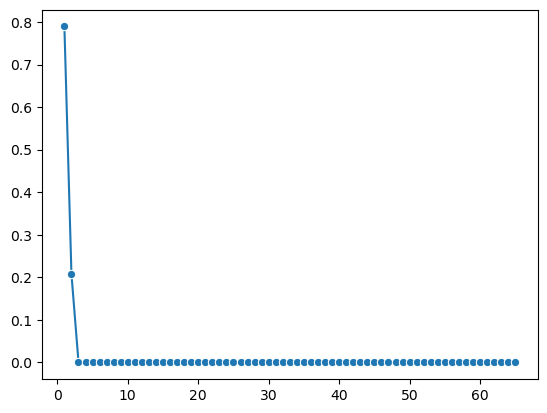

In [69]:
pca = PCA(n_components=65)
pca.fit(X_train_temp)

x = np.arange(pca.n_components_) + 1
y = pca.explained_variance_ratio_
sns.lineplot(x=x, y=y, marker='o')

Есть резкое снижение объяснённой дисперсии при увеличении размерности.

In [71]:
model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)

for n in range(20, 31, 5):
    pca = PCA(n_components=n)
    X_train_reduced = pca.fit_transform(X_train_temp)
    X_test_reduced = pca.transform(X_test_temp)
    print(n, get_scores(model, X_train_reduced, y_train, X_test_reduced, y_test))

20 (0.8394412728462868, 0.8297447531445232)
25 (0.8394446968665512, 0.8300470221706278)
30 (0.8395488221806963, 0.829867126250571)


Точность постепенно увеличивается с увеличением размерности. Оставновимся на 13 признаках.

In [ ]:
pca = PCA(n_components=13)
X_train_reduced = pca.fit_transform(X_train_temp)
X_test_reduced = pca.transform(X_test_temp)

In [ ]:
%%time
cat_model = CatBoostRegressor(random_state=RANDOM_STATE, verbose=0)

params = {'n_estimators': [1500, 1600, 1700],
          'learning_rate': np.arange(0.02, 0.051, 0.01),
          'max_depth': range(5, 8),
          'l2_leaf_reg': range(4, 7)}

grid_cv = GridSearchCV(cat_model, param_grid=params, cv=4, scoring='r2', verbose=2)
grid_cv.fit(X_train_reduced[:10000], y_train.iloc[:10000])

print(grid_cv.best_params_)
print(grid_cv.best_score_)

In [ ]:
best_model = CatBoostRegressor(**{'l2_leaf_reg': 5,
                                  'learning_rate': 0.03,
                                  'max_depth': 6,
                                  'n_estimators': 1600},
                                  random_state=RANDOM_STATE, verbose=0)

get_scores(best_model, X_train_reduced, y_train, X_test_reduced, y_test)

(0.8367469202301153, 0.8303033812978924)

Результат после снижения размерности оказался хуже. Таким образом, наилучший пайпалйн имеет вид:

In [72]:
Pipeline([
          ('poly_features', PolynomialFeatures(include_bias=False)),
          ('selector', SelectFromModel(DecisionTreeRegressor(max_depth=10,
                                                             random_state=RANDOM_STATE),
                                       threshold=-np.inf, max_features=65)),
          ('model', CatBoostRegressor(random_state=RANDOM_STATE, verbose=0))
          ])

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('selector',
                 SelectFromModel(estimator=DecisionTreeRegressor(max_depth=10,
                                                                 random_state=313),
                                 max_features=65, threshold=-inf)),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x000001831817A510>)])

Точность предсказания на тестовых данных с данным пайплайном составляет `R2` = `0.846`.